Importando as Bibliotecas

In [1]:
import pandas as pd
import healpy as hp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import seaborn as sns
import matplotlib
from keras import models, layers
from tensorflow import keras
import time
import copy
from statistics import variance

#rede neural
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
import math

#path
from astropy.table import Table
#importar o resto

#preparando dados
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import StratifiedShuffleSplit

 pegando os dados

In [4]:
path = "/media/new-drive/optical-data/DES-photz"

In [238]:
des_total_file = os.listdir(path)

In [ ]:
pathDES_total = "/media/new-drive/optical-data/DES-photz/"+str(des_total_file[0])
des_total = Table.read(pathDES_total)
des_total = des_total.to_pandas()
for i in range(len(des_total_file)-1):
    print(i)
    pathDES_total = "/media/new-drive/optical-data/DES-photz/"+str(des_total_file[i+1])
    des_aux_total = Table.read(pathDES_total)
    des_aux_total = des_aux_total.to_pandas()
    des_total = des_total.append(des_aux_total,ignore_index = True)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148


In [ ]:
des_total

In [185]:
filename = []
for entry in os.listdir(path):
    if os.path.isfile(os.path.join(path,entry)):
        print(entry)

PixelFit_64_16592.csv
PixelFit_64_20624.csv
PixelFit_64_20840.csv
PixelFit_64_21642.csv
PixelFit_64_21650.csv
PixelFit_64_21654.csv
PixelFit_64_21905.csv
PixelFit_64_21910.csv
PixelFit_64_22145.csv
PixelFit_64_22146.csv
PixelFit_64_22147.csv
PixelFit_64_22148.csv
PixelFit_64_22149.csv
PixelFit_64_22150.csv
PixelFit_64_22151.csv
PixelFit_64_22153.csv
PixelFit_64_22154.csv
PixelFit_64_22155.csv
PixelFit_64_22156.csv
PixelFit_64_22157.csv
PixelFit_64_22158.csv
PixelFit_64_22159.csv
PixelFit_64_22160.csv
PixelFit_64_22161.csv
PixelFit_64_22162.csv
PixelFit_64_22163.csv
PixelFit_64_22164.csv
PixelFit_64_22165.csv
PixelFit_64_22166.csv
PixelFit_64_22167.csv
PixelFit_64_40103.csv
PixelFit_64_40104.csv
PixelFit_64_40105.csv
PixelFit_64_40106.csv
PixelFit_64_40107.csv
PixelFit_64_40108.csv
PixelFit_64_40109.csv
PixelFit_64_40110.csv
PixelFit_64_40111.csv
PixelFit_64_40112.csv
PixelFit_64_40113.csv
PixelFit_64_40114.csv
PixelFit_64_40115.csv
PixelFit_64_40116.csv
PixelFit_64_40117.csv
PixelFit_6

In [186]:
d = Table.read(path)
d = d.to_pandas()

IORegistryError: Format could not be identified based on the file name or contents, please provide a 'format' argument.
The available formats are:
           Format           Read Write Auto-identify Deprecated
--------------------------- ---- ----- ------------- ----------
                      ascii  Yes   Yes            No           
               ascii.aastex  Yes   Yes            No           
                ascii.basic  Yes   Yes            No           
                  ascii.cds  Yes    No            No           
     ascii.commented_header  Yes   Yes            No           
                  ascii.csv  Yes   Yes           Yes           
              ascii.daophot  Yes    No            No           
                 ascii.ecsv  Yes   Yes           Yes           
           ascii.fast_basic  Yes   Yes            No           
ascii.fast_commented_header  Yes   Yes            No           
             ascii.fast_csv  Yes   Yes            No           
       ascii.fast_no_header  Yes   Yes            No           
             ascii.fast_rdb  Yes   Yes            No           
             ascii.fast_tab  Yes   Yes            No           
          ascii.fixed_width  Yes   Yes            No           
ascii.fixed_width_no_header  Yes   Yes            No           
 ascii.fixed_width_two_line  Yes   Yes            No           
                 ascii.html  Yes   Yes           Yes           
                 ascii.ipac  Yes   Yes            No           
                ascii.latex  Yes   Yes           Yes           
            ascii.no_header  Yes   Yes            No           
                  ascii.rdb  Yes   Yes           Yes           
                  ascii.rst  Yes   Yes            No           
           ascii.sextractor  Yes    No            No           
                  ascii.tab  Yes   Yes            No           
                       asdf  Yes   Yes           Yes           
                       fits  Yes   Yes           Yes           
                       hdf5  Yes   Yes           Yes           
                 pandas.csv  Yes   Yes            No           
                 pandas.fwf  Yes    No            No           
                pandas.html  Yes   Yes            No           
                pandas.json  Yes   Yes            No           
                    votable  Yes   Yes           Yes           
                     aastex  Yes   Yes            No        Yes
                        cds  Yes    No            No        Yes
                        csv  Yes   Yes            No        Yes
                    daophot  Yes    No            No        Yes
                       html  Yes   Yes            No        Yes
                       ipac  Yes   Yes            No        Yes
                      latex  Yes   Yes            No        Yes
                        rdb  Yes   Yes            No        Yes

In [170]:
d

ID       RA_1     DEC_1       z  z_Err     flag  \
0      b'VIPERS 110183204'  30.938091 -4.777137  0.8625 -9.999  b' 2.2'   
1      b'VIPERS 107103627'  36.644029 -5.977520  0.8799 -9.999  b' 2.5'   
2      b'VIPERS 107103628'  36.672479 -5.977282  0.5614 -9.999  b' 4.4'   
3      b'VIPERS 107103698'  36.678549 -5.976197  0.8175 -9.999  b' 2.5'   
4      b'VIPERS 107103810'  36.810072 -5.976481  0.9880 -9.999  b' 3.5'   
...                    ...        ...       ...     ...    ...      ...   
47653  b'VIPERS 116025312'  35.942905 -5.493796  0.9505 -9.999  b' 2.5'   
47654  b'VIPERS 116026941'  35.976078 -5.485066  0.4956 -9.999  b' 2.4'   
47655  b'VIPERS 116027557'  35.969004 -5.481511  0.4978 -9.999  b' 2.5'   
47656  b'VIPERS 116031855'  35.950926 -5.457638  0.4979 -9.999  b' 3.5'   
47657  b'VIPERS 116031866'  35.949695 -5.458004  0.7530 -9.999  b' 4.5'   

          source comments  totobs  totexp  ...  SPREADERR_MODEL_R  \
0      b'VIPERS'     b'-'      -9      -9  ...           0.005274   
1      b'VIPERS'     b'-'      -9      -9  ...           0.002011   
2      b'VIPERS'     b'-'      -9      -9  ...           0.000984   
3      b'VIPERS'     b'-'      -9      -9  ...           0.002790   
4      b'VIPERS'     b'-'      -9      -9  ...           0.004319   
...          ...      ...     ...     ...  ...                ...   
47653  b'VIPERS'     b'-'      -9      -9  ...           0.005064   
47654  b'VIPERS'     b'-'      -9      -9  ...           0.002487   
47655  b'VIPERS'     b'-'      -9      -9  ...           0.004079   
47656  b'VIPERS'     b'-'      -9      -9  ...           0.001198   
47657  b'VIPERS'     b'-'      -9      -9  ...           0.002360   

      SPREADERR_MODEL_I  SPREADERR_MODEL_Z  SPREADERR_MODEL_Y  \
0              0.003328           0.004998           0.017579   
1              0.001790           0.002247           0.011369   
2              0.000720           0.000835           0.003422   
3              0.001830           0.002291           0.009595   
4              0.002232           0.001744           0.008616   
...                 ...                ...                ...   
47653          0.003114           0.003167           0.008609   
47654          0.003085           0.004270           0.011023   
47655          0.004524           0.004325           0.014538   
47656          0.001250           0.001857           0.005478   
47657          0.001317           0.001429           0.004394   

       WAVG_SPREADERR_MODEL_G  WAVG_SPREADERR_MODEL_R  WAVG_SPREADERR_MODEL_I  \
0                  -99.000000              -99.000000                0.003946   
1                    0.003144                0.003403                0.002033   
2                    0.002639                0.001304                0.000754   
3                    0.003182                0.004029                0.002431   
4                  -99.000000                0.006201                0.002499   
...                       ...                     ...                     ...   
47653              -99.000000              -99.000000                0.002799   
47654              -99.000000                0.003209                0.002697   
47655                0.006062                0.003876                0.004101   
47656                0.002456                0.001241                0.001319   
47657              -99.000000                0.002358                0.001362   

       WAVG_SPREADERR_MODEL_Z  WAVG_SPREADERR_MODEL_Y    random  
0                  -99.000000              -99.000000  0.846429  
1                    0.002936              -99.000000  0.080008  
2                    0.000884                0.003498  0.522909  
3                    0.002787              -99.000000  0.891630  
4                    0.002281              -99.000000  0.693547  
...                       ...                     ...       ...  
47653                0.003040              -99.000000  0.938553  
47654       

match vipersxdes

In [2]:
pathMatch = "/media/new-drive/optical-data/data/vipers.fits"

In [3]:
match = Table.read(pathMatch)
match = match.to_pandas()

In [4]:
match = match.drop_duplicates()
match

ID       RA_1     DEC_1       z  z_Err     flag  \
0      b'VIPERS 110183204'  30.938091 -4.777137  0.8625 -9.999  b' 2.2'   
1      b'VIPERS 107103627'  36.644029 -5.977520  0.8799 -9.999  b' 2.5'   
2      b'VIPERS 107103628'  36.672479 -5.977282  0.5614 -9.999  b' 4.4'   
3      b'VIPERS 107103698'  36.678549 -5.976197  0.8175 -9.999  b' 2.5'   
4      b'VIPERS 107103810'  36.810072 -5.976481  0.9880 -9.999  b' 3.5'   
...                    ...        ...       ...     ...    ...      ...   
47653  b'VIPERS 116025312'  35.942905 -5.493796  0.9505 -9.999  b' 2.5'   
47654  b'VIPERS 116026941'  35.976078 -5.485066  0.4956 -9.999  b' 2.4'   
47655  b'VIPERS 116027557'  35.969004 -5.481511  0.4978 -9.999  b' 2.5'   
47656  b'VIPERS 116031855'  35.950926 -5.457638  0.4979 -9.999  b' 3.5'   
47657  b'VIPERS 116031866'  35.949695 -5.458004  0.7530 -9.999  b' 4.5'   

          source comments  totobs  totexp  ...  SPREADERR_MODEL_R  \
0      b'VIPERS'     b'-'      -9      -9  ...           0.005274   
1      b'VIPERS'     b'-'      -9      -9  ...           0.002011   
2      b'VIPERS'     b'-'      -9      -9  ...           0.000984   
3      b'VIPERS'     b'-'      -9      -9  ...           0.002790   
4      b'VIPERS'     b'-'      -9      -9  ...           0.004319   
...          ...      ...     ...     ...  ...                ...   
47653  b'VIPERS'     b'-'      -9      -9  ...           0.005064   
47654  b'VIPERS'     b'-'      -9      -9  ...           0.002487   
47655  b'VIPERS'     b'-'      -9      -9  ...           0.004079   
47656  b'VIPERS'     b'-'      -9      -9  ...           0.001198   
47657  b'VIPERS'     b'-'      -9      -9  ...           0.002360   

      SPREADERR_MODEL_I  SPREADERR_MODEL_Z  SPREADERR_MODEL_Y  \
0              0.003328           0.004998           0.017579   
1              0.001790           0.002247           0.011369   
2              0.000720           0.000835           0.003422   
3              0.001830           0.002291           0.009595   
4              0.002232           0.001744           0.008616   
...                 ...                ...                ...   
47653          0.003114           0.003167           0.008609   
47654          0.003085           0.004270           0.011023   
47655          0.004524           0.004325           0.014538   
47656          0.001250           0.001857           0.005478   
47657          0.001317           0.001429           0.004394   

       WAVG_SPREADERR_MODEL_G  WAVG_SPREADERR_MODEL_R  WAVG_SPREADERR_MODEL_I  \
0                  -99.000000              -99.000000                0.003946   
1                    0.003144                0.003403                0.002033   
2                    0.002639                0.001304                0.000754   
3                    0.003182                0.004029                0.002431   
4                  -99.000000                0.006201                0.002499   
...                       ...                     ...                     ...   
47653              -99.000000              -99.000000                0.002799   
47654              -99.000000                0.003209                0.002697   
47655                0.006062                0.003876                0.004101   
47656                0.002456                0.001241                0.001319   
47657              -99.000000                0.002358                0.001362   

       WAVG_SPREADERR_MODEL_Z  WAVG_SPREADERR_MODEL_Y    random  
0                  -99.000000              -99.000000  0.846429  
1                    0.002936              -99.000000  0.080008  
2                    0.000884                0.003498  0.522909  
3                    0.002787              -99.000000  0.891630  
4                    0.002281              -99.000000  0.693547  
...                       ...                     ...       ...  
47653                0.003040              -99.000000  0.938553  
47654       

In [5]:
max(match["z"])

3.388400077819824

In [6]:
match_auto_G = match["MAG_AUTO_G_DERED"]
match_auto_R = match["MAG_AUTO_R_DERED"]
match_auto_Y = match["MAG_AUTO_Y_DERED"]
match_auto_I = match["MAG_AUTO_I_DERED"]
match_auto_Z = match["MAG_AUTO_Z_DERED"]
match_ID = match["COADD_OBJECT_ID"]
match_z = match["z"]

In [7]:
#Retirando as duplicadas do match.
ind_duplicadas = np.where(match_ID.duplicated(keep='first')==True)[0]

In [8]:
ind_duplicadas

array([ 6986, 11768, 12409, 13205, 15133, 20580, 21977, 29687, 34060,
       42011, 46180, 46351])

In [9]:
match_auto_G = match_auto_G.drop(ind_duplicadas)
match_auto_Y = match_auto_Y.drop(ind_duplicadas)
match_auto_R = match_auto_R.drop(ind_duplicadas)
match_auto_I = match_auto_I.drop(ind_duplicadas)
match_auto_Z = match_auto_Z.drop(ind_duplicadas)
match_z = match_z.drop(ind_duplicadas)
match_ID = match_ID.drop(ind_duplicadas)

In [10]:
match_auto_G = match_auto_G.reset_index(drop=True)
match_auto_Y = match_auto_Y.reset_index(drop=True)
match_auto_R = match_auto_R.reset_index(drop=True)
match_auto_I = match_auto_I.reset_index(drop=True)
match_auto_Z = match_auto_Z.reset_index(drop=True)
match_z = match_z.reset_index(drop=True)
match_ID = match_ID.reset_index(drop=True)

In [11]:
match_z

0        0.8625
1        0.8799
2        0.5614
3        0.8175
4        0.9880
          ...  
47641    0.9505
47642    0.4956
47643    0.4978
47644    0.4979
47645    0.7530
Name: z, Length: 47646, dtype: float32

DES

Para pegarmos os dados correspondentes ao match temos que transformar os pixels do HPIX_64 de NESTED para RING de acordo com o seu nside(64)

In [12]:
match_pixel = match['HPIX_64']
match_pixel = match_pixel.drop_duplicates()
match_pixel = hp.nest2ring(64, match_pixel)
match_pixel = np.asarray(match_pixel)
filename = []
for i in range(len(match_pixel)):
    filename.append("PixelFit_64_"+str(match_pixel[i])+".fits")

In [13]:
pathDES = "/media/new-drive/optical-data/DES_64_Pixels/"+str(filename[0])
des = Table.read(pathDES)
des = des.to_pandas()
for i in range(len(filename)-1):
    pathDES = "/media/new-drive/optical-data/DES_64_Pixels/"+str(filename[i+1])
    des_aux = Table.read(pathDES)
    des_aux = des_aux.to_pandas()
    des = des.append(des_aux,ignore_index = True)

In [14]:
des

COADD_OBJECT_ID         TILENAME  HPIX_32  HPIX_64  HPIX_1024  \
0              61673600  b'DES0200-0333'     4426    17707    4533207   
1              61673595  b'DES0200-0333'     4426    17707    4533207   
2              61676064  b'DES0200-0333'     4426    17707    4533205   
3              61676207  b'DES0200-0333'     4426    17707    4533205   
4              61673605  b'DES0200-0333'     4426    17707    4533207   
...                 ...              ...      ...      ...        ...   
798480        117432105  b'DES0225-0624'     4420    17682    4526608   
798481        117432523  b'DES0225-0624'     4420    17682    4526608   
798482        117432693  b'DES0225-0624'     4420    17682    4526608   
798483        117432706  b'DES0225-0624'     4420    17682    4526608   
798484        117432749  b'DES0225-0624'     4420    17682    4526608   

        HPIX_4096  HPIX_16384         RA       DEC  ALPHAWIN_J2000  ...  \
0        72531327  1160501237  29.803960 -3.817937       29.803960  ...   
1        72531325  1160501215  29.805498 -3.817855       29.805498  ...   
2        72531287  1160500606  29.857072 -3.867963       29.857072  ...   
3        72531292  1160500679  29.846213 -3.870729       29.846213  ...   
4        72531327  1160501237  29.803315 -3.817997       29.803315  ...   
...           ...         ...        ...       ...             ...  ...   
798480   72425732  1158811717  36.068001 -6.401287       36.068001  ...   
798481   72425729  1158811670  36.047970 -6.409249       36.047970  ...   
798482   72425729  1158811668  36.050026 -6.412545       36.050026  ...   
798483   72425729  1158811667  36.048399 -6.412795       36.048399  ...   
798484   72425729  1158811665  36.049413 -6.413640       36.049413  ...   

        SPREADERR_MODEL_G  SPREADERR_MODEL_R  SPREADERR_MODEL_I  \
0                0.006882           0.005477           0.005703   
1                0.006970           0.002854           0.003066   
2                0.008097           0.001335           0.000675   
3                0.009921           0.004223           0.004030   
4                0.006218           0.002790           0.002470   
...                   ...                ...                ...   
798480           0.010461           0.003446           0.001924   
798481           0.005458           0.003522           0.003105   
798482           0.010813           0.001681           0.000918   
798483           0.001977           0.001007           0.001470   
798484           0.004331           0.002301           0.003426   

        SPREADERR_MODEL_Z  SPREADERR_MODEL_Y  WAVG_SPREADERR_MODEL_G  \
0                0.016222           0.019768              -99.000000   
1                0.009167           0.019080              -99.000000   
2                0.001068           0.002408              -99.000000   
3                0.010867           0.024070              -99.000000   
4                0.006269           0.018398              -99.000000   
...                   ...                ...                     ...   
798480           0.002392           0.009761              -99.000000   
798481           0.005480           0.011282              -99.000000   
798482           0.001108           0.004575              -99.000000   
798483           0.002087           0.008453                0.001921   
798484           0.004993           0.014206                0.006243   

        WAVG_SPREADERR_MODEL_R  WAVG_SPREADERR_MODEL_I  \
0                   -99.000000              -99.000000   
1                     0.004079                0.003844   
2                     0.001494                0.000737   
3                     0.006131              -99.000000   
4                     0.003839                0.002886   
...                        ...                     ...   
798480                0.003930                0.001751   
798481              -99.000000                0.003071   
798482                0.001786        

In [15]:
#i
des_auto_G = des["MAG_AUTO_G_DERED"]
des_auto_R = des["MAG_AUTO_R_DERED"]
des_auto_Y = des["MAG_AUTO_Y_DERED"]
des_auto_I = des["MAG_AUTO_I_DERED"]
des_auto_Z = des["MAG_AUTO_Z_DERED"]

des_ID = des["COADD_OBJECT_ID"]

## **Funções utilizadas no programa:**

In [16]:
def tirando_os_extremos (vetor):
    VetorSemEX = vetor.copy()
    VetorSemEX.drop(VetorSemEX[VetorSemEX>=90].index,inplace = True)
    vetor =  np.where(vetor>=90,max(VetorSemEX),vetor)
    print("Máximo valor do filtro:",max(vetor))
    return vetor

Editando os extremos

In [23]:
des_auto_G = pd.Series(des_auto_G, name='MAG_AUTO_G_DERED')
des_auto_R = pd.Series(des_auto_R, name='MAG_AUTO_R_DERED')
des_auto_I = pd.Series(des_auto_I, name='MAG_AUTO_I_DERED')
des_auto_Z = pd.Series(des_auto_Z, name='MAG_AUTO_Z_DERED')
des_auto_Y = pd.Series(des_auto_Y, name='MAG_AUTO_Y_DERED')

match_auto_G = pd.Series(match_auto_G, name='MAG_AUTO_G_DERED')
match_auto_R = pd.Series(match_auto_R, name='MAG_AUTO_R_DERED')
match_auto_I = pd.Series(match_auto_I, name='MAG_AUTO_I_DERED')
match_auto_Z = pd.Series(match_auto_Z, name='MAG_AUTO_Z_DERED')
match_auto_Y = pd.Series(match_auto_Y, name='MAG_AUTO_Y_DERED')

In [18]:
print('des')
des_auto_G = tirando_os_extremos(des_auto_G)
des_auto_R = tirando_os_extremos(des_auto_R)
des_auto_I = tirando_os_extremos(des_auto_I)
des_auto_Z = tirando_os_extremos(des_auto_Z)
des_auto_Y = tirando_os_extremos(des_auto_Y)
print('match')
match_auto_G = tirando_os_extremos(match_auto_G)
match_auto_R = tirando_os_extremos(match_auto_R)
match_auto_I = tirando_os_extremos(match_auto_I)
match_auto_Z = tirando_os_extremos(match_auto_Z)
match_auto_Y = tirando_os_extremos(match_auto_Y)

des
Máximo valor do filtro: 37.08720016479492
Máximo valor do filtro: 31.64885902404785
Máximo valor do filtro: 28.31576156616211
Máximo valor do filtro: 34.643035888671875
Máximo valor do filtro: 36.668426513671875
match
Máximo valor do filtro: 33.55958938598633
Máximo valor do filtro: 24.63819122314453
Máximo valor do filtro: 23.94902992248535
Máximo valor do filtro: 25.494186401367188
Máximo valor do filtro: 30.62488555908203


# **Comparando as galáxias de acordo com o COADD_OBJECT_ID**

In [19]:
ID_TF = des_ID.isin(match_ID)
ID_bi =  np.where(ID_TF==True,1,0)
ID_bi = pd.Series(ID_bi, name='ID_bi')

In [20]:
np.where(des_ID.isin(match_ID)==True)[0]

array([ 21196,  29983,  30153, ..., 794563, 794564, 794590])

In [21]:
sum(ID_bi)

47646

##### Indices do des com magnitudes diferentes - entregar Rafael

In [24]:
#def achar_discrepancias (des_G,des_R,des_I,des_Z,des_Y,match_G,match_R,match_I,match_Z,match_y):
col_G = np.where(des_auto_G.isin(match_auto_G)==True)[0]
col_R = np.where(des_auto_R.isin(match_auto_R)==True)[0]
col_I = np.where(des_auto_I.isin(match_auto_I)==True)[0]
col_Z = np.where(des_auto_Z.isin(match_auto_Z)==True)[0]
col_Y = np.where(des_auto_Y.isin(match_auto_Y)==True)[0]
col_ID_des = np.where(np.isin(des_ID, match_ID)==True)[0]
col_ID_match = np.where(np.isin(match_ID, des_ID)==True)[0]

ajeitando as mags

In [25]:
index_des = des_ID.iloc[col_ID_des].sort_values(ascending=True).reset_index().iloc[:,0]
index_match = match_ID.iloc[col_ID_match].sort_values(ascending=True).reset_index().iloc[:,0]

In [26]:
des_ID[index_des]

410055     63509013
410080     63509162
410070     63509183
410003     63509196
410006     63509241
            ...    
225694    310744732
225695    310744740
225703    310744773
225727    310744837
225736    310744867
Name: COADD_OBJECT_ID, Length: 47646, dtype: int64

In [27]:
match_ID[index_match]

20641     63509013
20624     63509162
20630     63509183
20631     63509196
20628     63509241
           ...    
11696    310744732
11697    310744740
11693    310744773
11691    310744837
11688    310744867
Name: COADD_OBJECT_ID, Length: 47646, dtype: int64

In [28]:
des_auto_G[index_des] = match_auto_G[index_match]
des_auto_R[index_des] = match_auto_R[index_match]
des_auto_I[index_des] = match_auto_I[index_match]
des_auto_Z[index_des] = match_auto_Z[index_match]
des_auto_Y[index_des] = match_auto_Y[index_match]

In [29]:
print('   ID des:', des_ID[32019])
print('ID vipers:', match_ID[946])
print('\nMagnitudes em cada filtro de acordo com o filtro:')
print('   des G:', des_auto_G[32019])
print('vipers G:',match_auto_G.iloc[946])
print('\n   des R:', des_auto_R[32019])
print('vipers R:',match_auto_R[946])
print('\n   des I:', des_auto_I[32019])
print('vipers I:',match_auto_I[946])
print('\n   des Z:', des_auto_Z[32019])
print('vipers Z:',match_auto_Z[946])
print('\n   des Y:', des_auto_Y[32019])
print('vipers Y:',match_auto_Y[946])

   ID des: 118913388
ID vipers: 118913388

Magnitudes em cada filtro de acordo com o filtro:
   des G: 23.540390014648438
vipers G: 23.540390014648438

   des R: 22.898136138916016
vipers R: 22.898136138916016

   des I: 22.300094604492188
vipers I: 22.300094604492188

   des Z: 22.641923904418945
vipers Z: 22.641923904418945

   des Y: 30.62488555908203
vipers Y: 30.62488555908203


In [30]:
#Ex:
print('   ID des:', des_ID[30366])
print('ID vipers:', match_ID[1303])
print('\nMagnitudes em cada filtro de acordo com o filtro:')
print('   des G:', des_auto_G[30366])
print('vipers G:',match_auto_G[1303])
print('\n   des R:', des_auto_R[30366])
print('vipers R:',match_auto_R[1303])
print('\n   des I:', des_auto_I[30366])
print('vipers I:',match_auto_I[1303])
print('\n   des Z:', des_auto_Z[30366])
print('vipers Z:',match_auto_Z[1303])
print('\n   des Y:', des_auto_Y[30366])
print('vipers Y:',match_auto_Y[1303])

   ID des: 118903817
ID vipers: 118903817

Magnitudes em cada filtro de acordo com o filtro:
   des G: 22.77089500427246
vipers G: 22.77089500427246

   des R: 22.341794967651367
vipers R: 22.341794967651367

   des I: 22.16625213623047
vipers I: 22.16625213623047

   des Z: 21.635377883911133
vipers Z: 21.635377883911133

   des Y: 30.62488555908203
vipers Y: 30.62488555908203


As galáxias podem ter o mesmo ID, mas magnitudes diferentes:

In [31]:
sum(ID_bi)

47646

Criando o dataset das cores

In [55]:
#Fazendo o dataset com as cores do des.
cores_des = pd.DataFrame()
cores_des["G-R"] = des_auto_G - des_auto_R
cores_des["R-I"] = des_auto_R - des_auto_I
cores_des["I-Z"] = des_auto_I - des_auto_Z
cores_des["Z-Y"] = des_auto_Z - des_auto_Y

cores_vipers = pd.DataFrame()
cores_vipers["G-R"] = match_auto_G - match_auto_R
cores_vipers["R-I"] = match_auto_R - match_auto_I
cores_vipers["I-Z"] = match_auto_I - match_auto_Z
cores_vipers["Z-Y"] = match_auto_Z - match_auto_Y

In [56]:
cores_des_mag = pd.DataFrame()
cores_des_mag["G-R"] = des_auto_G - des_auto_R
cores_des_mag["R-I"] = des_auto_R - des_auto_I
cores_des_mag["I-Z"] = des_auto_I - des_auto_Z
cores_des_mag["Z-Y"] = des_auto_Z - des_auto_Y
cores_des_mag['mag I'] = des_auto_I

cores_vipers_mag = pd.DataFrame()
cores_vipers_mag["G-R"] = match_auto_G - match_auto_R
cores_vipers_mag["R-I"] = match_auto_R - match_auto_I
cores_vipers_mag["I-Z"] = match_auto_I - match_auto_Z
cores_vipers_mag["Z-Y"] = match_auto_Z - match_auto_Y
cores_vipers_mag['mag I'] = match_auto_I

In [34]:
cores_des = np.array(cores_des)
cores_vipers = np.array(cores_vipers)

In [35]:
cores_des_mag = np.array(cores_des_mag)
cores_vipers_mag = np.array(cores_vipers_mag)

#### Calculando o z_fotometrico

In [36]:
X_train, X_test, y_train, y_test = train_test_split(cores_vipers, match_z, test_size=0.3, random_state=None)

In [40]:
from sklearn.neighbors import KNeighborsRegressor

In [43]:
model_fotometrico = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [44]:
model_fotometrico.fit(X_train, y_train)

KNeighborsRegressor()

In [45]:
def rede_neural_fotometrica (X,y,X_real):
    predito = []
    for i in range(10):
        treino_in, teste_in, treino_out, teste_out = train_test_split(X, y, test_size=0.3, random_state=None)
        model_fotometrico.fit(treino_in, treino_out)
        pred = model_fotometrico.predict(X_real)
        predito.append(pred)
    #print(len(predito))    
    predito_final = np.mean(predito,axis=0)
    return predito_final

In [46]:
test_predictions = rede_neural_fotometrica(cores_vipers,match_z,X_test)

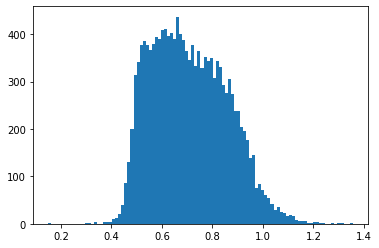

In [47]:
plt.hist(test_predictions, bins=100);

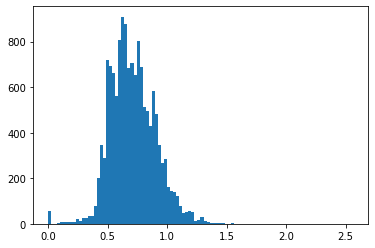

In [48]:
plt.hist(y_test, bins=100);

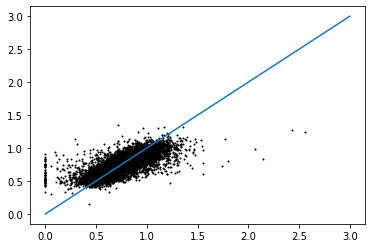

In [49]:
plt.scatter(y_test,test_predictions, s=1, c='k')
plt.plot([0,3],[0,3]);

In [50]:
####### z fotométrico para o DES:

In [51]:
z_fotometrico_des = rede_neural_fotometrica(cores_vipers,match_z,cores_des)

In [52]:
tabela_ID_z = pd.DataFrame()
tabela_ID_z["ID"] = des_ID
tabela_ID_z["z fotometrico"] = z_fotometrico_des

In [53]:
#Fazer a conta do modelo fotometrico em cada grupo. no for gigante. 

Vendo onde cortar o des

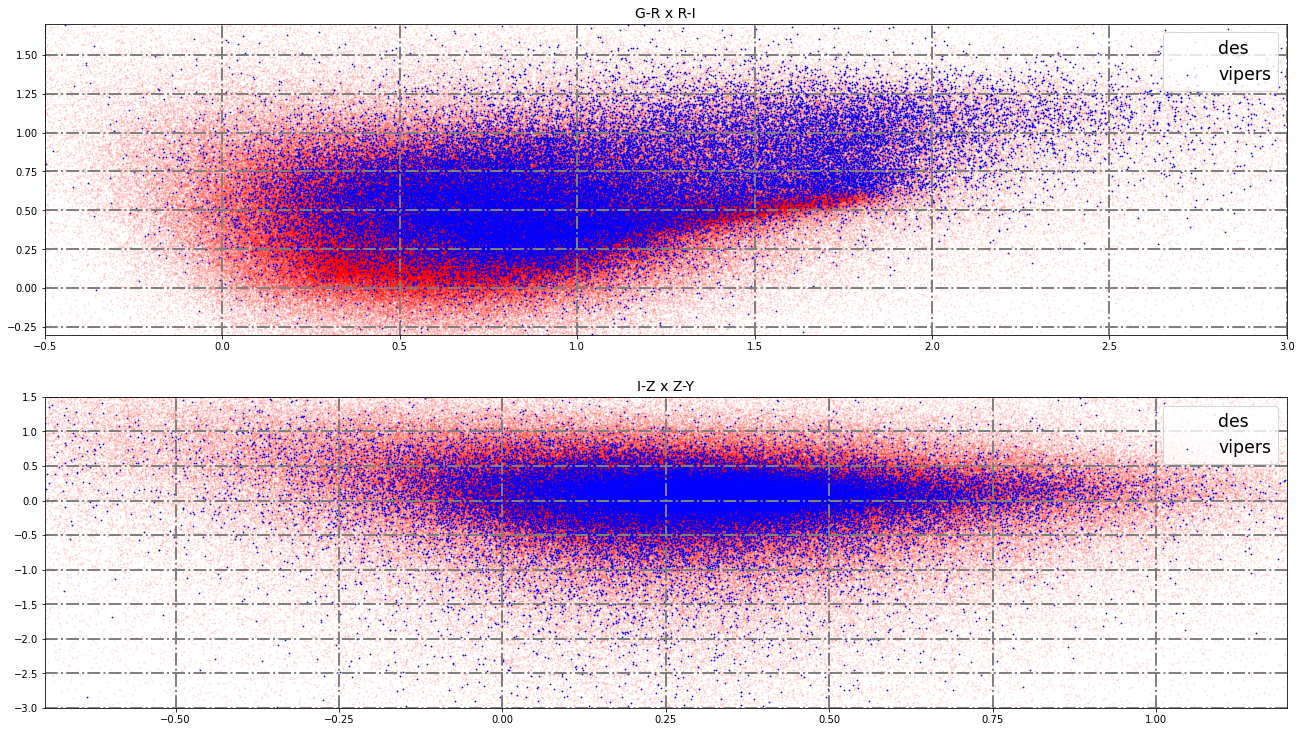

In [57]:
grid = plt.GridSpec(2,1, top= 2.5, right = 3)
#Se der ruim coloca como dataframe de novo.

ax1 = plt.subplot(grid[0,0])
ax1.scatter(cores_des.iloc[:,0], cores_des.iloc[:,1], color='r', label = 'des', s=0.5, alpha = 0.1)
ax1.scatter(cores_vipers.iloc[:,0], cores_vipers.iloc[:,1], color='b', label = 'vipers', s=0.5, alpha = 1)
ax1.grid(color='grey', linestyle='-.', linewidth=2)
ax1.legend(loc='upper right', fontsize='xx-large')
ax1.set_title('G-R x R-I', fontsize=14)
ax1.set_xlim(-0.5,3)
ax1.set_ylim(-0.3,1.7)
#ax1.set_label('G-R')

ax3 = plt.subplot(grid[1,0])
ax3.scatter(cores_des.iloc[:,2], cores_des.iloc[:,3], color='r', label = 'des', s=0.5, alpha = 0.1)
ax3.scatter(cores_vipers.iloc[:,2], cores_vipers.iloc[:,3], color='b', label = 'vipers', s=0.5, alpha = 1)
ax3.grid(color='grey', linestyle='-.', linewidth=2)
ax3.legend(loc='upper right', fontsize='xx-large')
ax3.set_title('I-Z x Z-Y', fontsize=14)
ax3.set_xlim(-0.7,1.2)
ax3.set_ylim(-3,1.5)

plt.savefig('cores.png', format='png')
plt.show();

Pelos gráficos acima vamos tirar as galáxias fora do limite acima.
G-R: (0.45,1.2)
R-I: (0.1,0.9)
I-Z: (0.15,0.55)
Z-Y: (-0.3,0.3)

In [58]:
#Cada cor
#G-R
G_R_max = np.where((cores_des.iloc[:,0]<=3)==True)[0]
G_R_min = np.where((cores_des.iloc[:,0]>=-0.5)==True)[0]
G_R = np.intersect1d(G_R_max, G_R_min)
print('galáxias da cor G-R:',G_R.shape)

#R-I
R_I_max = np.where((cores_des.iloc[:,1]<=1.7)==True)[0]
R_I_min = np.where((cores_des.iloc[:,2]>=-0.3)==True)[0]
R_I = np.intersect1d(R_I_max, R_I_min)
print('galáxias da cor R-I:',R_I.shape)

#I-Z
I_Z_max = np.where((cores_des.iloc[:,2]<=1.2)==True)[0]
I_Z_min = np.where((cores_des.iloc[:,2]>=-0.7)==True)[0]
I_Z = np.intersect1d(I_Z_max, I_Z_min)
print('galáxias da cor I-Z:',I_Z.shape)

#Z-Y
Z_Y_max = np.where((cores_des.iloc[:,3]<=1.5)==True)[0]
Z_Y_min = np.where((cores_des.iloc[:,3]>=-3)==True)[0]
Z_Y = np.intersect1d(Z_Y_max, Z_Y_min)
print('galáxias da cor Z-Y:',Z_Y.shape)

galáxias da cor G-R: (780477,)
galáxias da cor R-I: (733456,)
galáxias da cor I-Z: (769778,)
galáxias da cor Z-Y: (720610,)


In [59]:
#Interse;áo das cores 
col_1 = np.intersect1d(G_R, R_I)
print('1:',col_1.shape)
col_2 = np.intersect1d(I_Z, Z_Y)
print('2:',col_2.shape)
col_melhor = np.intersect1d(col_1, col_2)
print('melhor:',col_melhor.shape)

col_vipers = np.intersect1d(col_melhor, col_ID_des)
print('galaxias comtempladas:', col_vipers.shape)

1: (719670,)
2: (706383,)
melhor: (662924,)
galaxias comtempladas: (45401,)


In [60]:
#Selecionando 100 000 galáxias desse pedaco do espaco
col_melhorado = cores_des.iloc[col_melhor,:].reset_index().sample(n=100000).iloc[:,0]

##### *Kdtree*

In [61]:
#Calcula a distancia entre dois pontos em um espaço 4D.
def distancia(point1,point2):
    w1, x1, y1, z1  = point1
    w2, x2, y2, z2  = point2
    
    dw = w1 - w2
    dx = x1 - x2
    dy = y1 - y2
    dz = z1 - z2
    
    
    return math.sqrt(dw*dw + dx*dx + dy*dy + dz*dz)

In [62]:
def menor_distancia(pivot, p1, p2):
    if p1 is None:
        return p2
    
    if p2 is None:
        return p1
    
    d1 = distancia(pivot,p1)
    d2 = distancia(pivot,p2)
    
    if d1<d2:
        return p1
    else:
        return p2
    

In [63]:
def kdtree_ponto_mais_perto(root, ponto, depth=0):
    if root is None:
        return None
    
    axis = depth % k
    
    proximo_no = None
    no_oposto = None
    
    if ponto[axis]< root['point'][axis]:
        proximo_no = root['left']
        no_oposto = root['right']
    else:
        proximo_no = root['right']
        no_oposto = root['left']        
        
    melhor = menor_distancia(ponto,
                             kdtree_ponto_mais_perto(proximo_no, ponto, depth+1),
                             root['point'])
    
    if distancia(ponto,melhor)>abs(ponto[axis] - root['point'][axis]):
        melhor = menor_distancia(ponto,
                             kdtree_ponto_mais_perto(proximo_no, ponto, depth+1),
                             melhor)
        
    return melhor    
        

In [64]:
#Número de eixos (cores) a serem cortados.
k=4

In [65]:
grupos = []

In [70]:
def construir_kdtree (pontos, depth=0):
    n = len(pontos)
    
    if n<=0:
        return None
    
    #Para sempre cortar nos eixos certos, vamos fazer o mod de k
    axis = depth % k
    
    #A cada iteração eu 'corto' em uma direção (axis) diferente.
    #Então a cda iteração eu vou ordenando o dataset de acordo com a direção 
    #que será cortada, para ter o mesmo
    #número de pontos nos dois lados da árvore. 
    pontos_ordenados = sorted(pontos, key=lambda point: point[axis])

#----------------------------------------------------------------------------------    
    #Como queremos uma árvore de 8 dimensões, vamos pegar todos os nós de quando 
    #estivermos na octagésima ordem:
    
#1 tira o # e no segundo coloca    
#    if depth==9:
#        grupos.append(pontos_ordenados[int(n/2)])
#-----------------------------------------------------------------------------------
    #print(pontos_ordenados)    
    #construindo o nó.
    return {
        'point': pontos_ordenados[int(n/2)],
        'left': construir_kdtree(pontos_ordenados[:int(n/2)], depth+1),
        'right': construir_kdtree(pontos_ordenados[int(n/2)+1:], depth+1)        
    }

In [67]:
cores_des = np.array(cores_des)
cores_vipers = np.array(cores_vipers)

In [68]:
kdtree = construir_kdtree(cores_des[col_melhorado])

In [69]:
#grupo das 512 galáxias que separam todo o dataset.
grupos = np.array(grupos)

In [70]:
#pp = pprint.PrettyPrinter(indent=0.1)
#pp.pprint(kdtree)

In [71]:
kdtree_real = construir_kdtree(grupos)

In [72]:
matriz_des = np.zeros((4, 800000, 512))
matriz_vipers = np.zeros((4, 800000, 512))

In [73]:
#Preencher a tabela
def preencher_matriz(matriz, cor):
    for i in range(cor.shape[0]):
        print(i)
        ponto_perto = kdtree_ponto_mais_perto(kdtree_real, cor[i])
        for j in range(512):
            if (ponto_perto == grupos[j]).all():
                matriz[:,i,j] = cor[i]
            
    return matriz

In [74]:
cores_des[col_melhorado]

array([[ 0.22848701,  0.19382668,  0.89694405,  1.22716331],
       [ 1.41376114,  0.35842133,  0.26365662,  0.02917099],
       [ 0.89043236,  0.37632751,  0.21319771,  0.14250374],
       ...,
       [ 1.33848572,  0.8127985 , -0.12614155,  0.55992794],
       [ 0.6353817 , -0.32431984,  0.97918701, -0.92915726],
       [ 1.78598785,  0.92386627,  0.3910923 ,  0.41576958]])

In [77]:
#Criando uma matrix 3D com todos os grupos (~23 min)
matriz_vipers = preencher_matriz(matriz_vipers, cores_vipers)
matriz_des = preencher_matriz(matriz_des, cores_des[col_melhorado,:])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [85]:
 from sklearn.neighbors import KNeighborsClassifier

número de galáxias do vipers no des: 13
Galáxias do des no grupo 0 : 242
Galáxias do vipers grupo 0 : 13
porcentagem de vipers no grupo 0 : 0.05371900826446281 %
z medio: 0.6790276
número de galáxias do vipers no des: 19
Galáxias do des no grupo 1 : 292
Galáxias do vipers grupo 1 : 19
porcentagem de vipers no grupo 0 : 0.06506849315068493 %
z medio: 0.61198103
número de galáxias do vipers no des: 20
Galáxias do des no grupo 2 : 187
Galáxias do vipers grupo 2 : 20
porcentagem de vipers no grupo 0 : 0.10695187165775401 %
z medio: 0.59273005
número de galáxias do vipers no des: 10
Galáxias do des no grupo 3 : 306
Galáxias do vipers grupo 3 : 10
porcentagem de vipers no grupo 0 : 0.032679738562091505 %
z medio: 0.49154916
número de galáxias do vipers no des: 12
Galáxias do des no grupo 4 : 164
Galáxias do vipers grupo 4 : 12
porcentagem de vipers no grupo 0 : 0.07317073170731707 %
z medio: 0.6624459
número de galáxias do vipers no des: 10
Galáxias do des no grupo 5 : 132
Galáxias do vipers

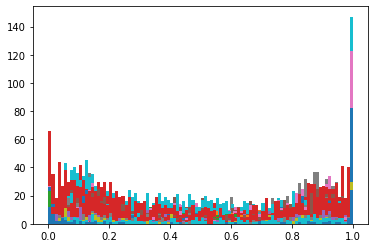

In [92]:
#Rodando por toda a matriz
tabela_final = pd.DataFrame()
d = {'G-R': [1], 'R-I': [1], 'I-Z': [1], 'Z-Y': [1], 'folha': [1], 'lambda': [1], 'z_fotometrico': [1]}
tabela_final = pd.DataFrame(data=d)
lambda_medio = []
z_medio = []
variancia = []
quant_vipers_folha = []
quant_des_folha = []
fracao = []

#pp = PdfPages('test.pdf')

for i in range(512):
    
    #Criando o dataset do grupo i.
    grupo_des = criar_dataset(matriz_des,i)
    grupo_vipers = criar_dataset(matriz_vipers, i)
    quant_vipers_folha.append(len(grupo_vipers))
    quant_des_folha.append(len(grupo_des))
    
    #Vendo se todos os grupos estão certos.
    grupo_vipers = pd.DataFrame(grupo_vipers)
    grupo_des = pd.DataFrame(grupo_des)
    cores_des = pd.DataFrame(cores_des)
    grupo_des = ajeitando_quadrado(grupo_des,grupo_vipers)
    col_indices_match = match_grupo(grupo_vipers,grupo_des)
    
    #Quantidade de galáxias de vipers e do des em cada grupo:
    print('Galáxias do des no grupo', i, ':', len(grupo_des))
    print('Galáxias do vipers grupo', i, ':', len(grupo_vipers))
    if len(grupo_des)==0:
        print('porcentagem de vipers no grupo',0,':', 100, '%')
    else:    
        print('porcentagem de vipers no grupo',0,':', len(grupo_vipers)/len(grupo_des), '%') 
    fracao.append(len(grupo_vipers)/len(grupo_des))
    
    #Calculando o z_fotométrico de cada grupo
    pred_z = model_fotometrico.predict(grupo_des)
    print('z medio:',np.mean(pred_z))
    z_medio.append(np.mean(pred_z))
    
    if len(grupo_des)!=0:
    
        #Criando a coluna com os números binários 
        ID_bi = np.zeros(len(grupo_des))
        ID_bi[col_indices_match]=1
        ID_bi = pd.Series(ID_bi, name='ID_bi')
    
        if len(grupo_vipers)<=5:
            d = {'G-R': grupo_des[0], 'R-I': grupo_des[1], 'I-Z': grupo_des[2], 'Z-Y': grupo_des[3], 
                 'folha': [i]*len(grupo_des[0]), 'lambda': [0]*len(grupo_des[0]), 'z_fotometrico': pred_z}
            tabela = pd.DataFrame(data=d)
            lambda_medio.append(0)
            variancia.append(0)
    
    
        else:
            #---------------------------------------------------------------------------------------
            #Rede Neural
            #Concatenando as colunas para conseguir misturar os dados
            df = pd.concat([grupo_des, ID_bi],  axis = 1)
            #Misturando o dataset
            df = df.sample(frac=1)
        
            dif_sem_match = len(grupo_des) - len(grupo_vipers)
            #Balanceando o dataset
            if dif_sem_match<len(grupo_vipers):
                match_df = df.loc[df['ID_bi'] == 1][0:dif_sem_match]
                sem_match_df = df.loc[df['ID_bi'] == 0][0:dif_sem_match]
            else:
                match_df = df.loc[df['ID_bi'] == 1]
                sem_match_df = df.loc[df['ID_bi'] == 0][0:len(grupo_vipers)]
        
            normal_distributed_df = pd.concat([match_df, sem_match_df])
            new_df = normal_distributed_df.sample(frac=1, random_state=None)
        
            #Divindo o dataset
            X = new_df.drop('ID_bi', axis=1)
            y = new_df['ID_bi']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)
        
            pred = rede_neural(X,y, df.iloc[:,0:4])
            #model.fit(X_train, y_train)
            #pred = model.predict_proba(df.iloc[:,0:4])
            pred_pd = pd.Series(pred)
            #---------------------------------------------------------------------------------------
            
            #Histograma do lambda
            plt.hist(pred, bins=100)
            #plt.title('grupo:',i)
            #pp.savefig()    
        
         
        
            d = {'G-R': df.drop('ID_bi', axis=1).iloc[:,0], 'R-I': df.drop('ID_bi', axis=1).iloc[:,1],
                 'I-Z': df.drop('ID_bi', axis=1).iloc[:,2], 'Z-Y': df.drop('ID_bi', axis=1).iloc[:,3],
                 'folha': [i]*len(df.drop('ID_bi', axis=1).iloc[:,3]),
                 'lambda': pred_pd, 'z_fotometrico': pred_z}
            tabela = pd.DataFrame(data=d)
            lambda_medio.append(sum(pred_pd)/len(df.drop('ID_bi', axis=1).iloc[:,3]))
            variancia.append(variance(pred_pd))
            
        tabela_final = tabela_final.append(tabela)     
        
        tabela_final_1 = tabela_final.reset_index()     
        tabela_final_2 = tabela_final_1.drop(tabela_final_1.index[0])
        tabela_final = tabela_final_2.drop(columns=['index'])
        
    else:
        lambda_medio.append(0)
        variancia.append(0)


#pp.close()        

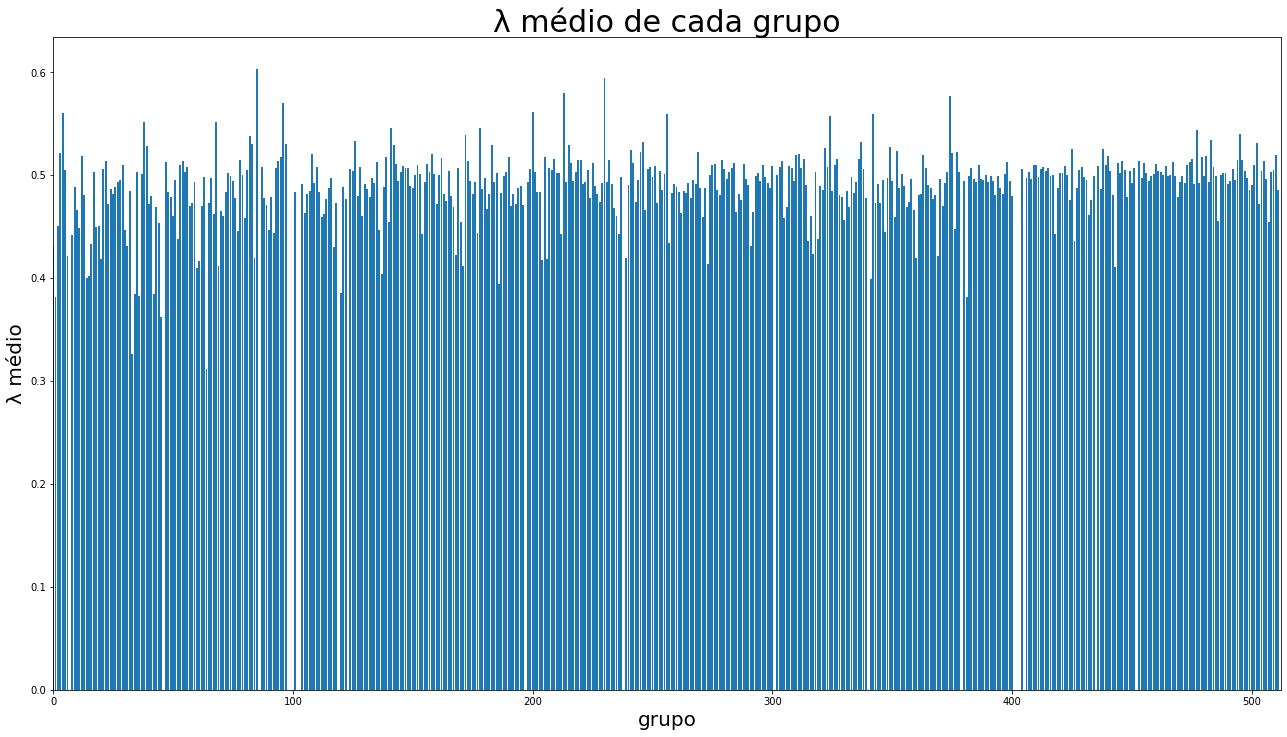

In [93]:
f, (ax) = plt.subplots(1, 1, figsize=(22,12))
plt.bar(range(len(lambda_medio)),lambda_medio)
plt.title('λ médio de cada grupo', fontsize=30)
plt.xlabel("grupo", fontsize=20)
plt.ylabel("λ médio", fontsize=20)
ax.set_xlim(0, 512)
#plt.savefig("lambda_medio")
plt.show();

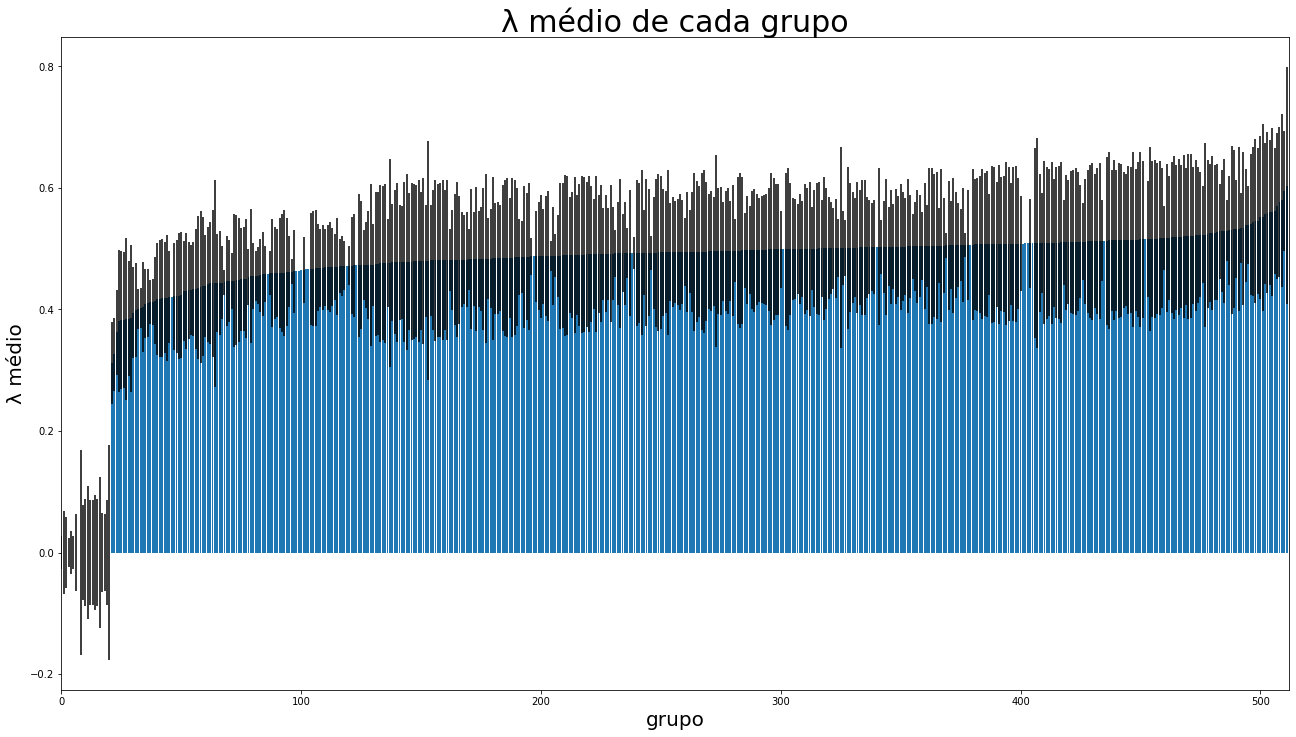

In [94]:
crescente = np.argsort(lambda_medio)
cre = pd.Series(lambda_medio)

f, (ax) = plt.subplots(1, 1, figsize=(22,12))
plt.bar(range(len(lambda_medio)),cre[crescente], yerr=variancia)
plt.title('λ médio de cada grupo', fontsize=30)
plt.xlabel("grupo", fontsize=20)
plt.ylabel("λ médio", fontsize=20)
ax.set_xlim(0, 512)
#plt.savefig("lambda_medio")
plt.show();

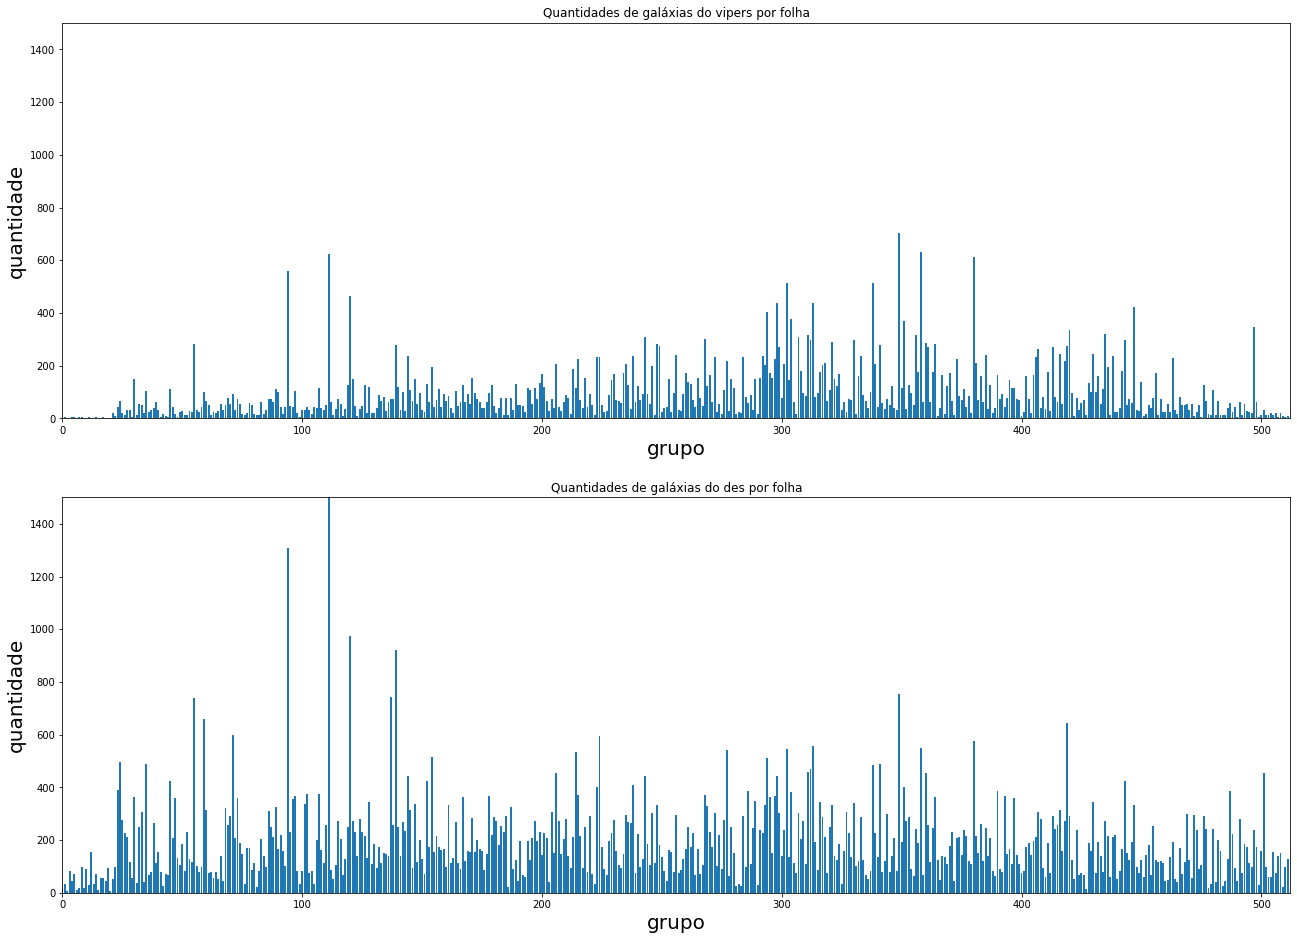

In [95]:
#kdtree só com as galásxias do vipers e com as galáxias do des 
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(22,16))

cre_vipers = pd.Series(quant_vipers_folha)
ax1.bar(range(len(quant_vipers_folha)),cre_vipers[crescente])
ax1.title.set_text('Quantidades de galáxias do vipers por folha')
ax1.set_xlabel("grupo", fontsize=20)
ax1.set_ylabel("quantidade", fontsize=20)
ax1.set_xlim(0,512)
ax1.set_ylim(0,1500)

cre_des = pd.Series(quant_des_folha)
ax2.bar(range(len(quant_des_folha)),cre_des[crescente])
ax2.title.set_text('Quantidades de galáxias do des por folha')
ax2.set_xlabel("grupo", fontsize=20)
ax2.set_ylabel("quantidade", fontsize=20)
ax2.set_xlim(0,512)
ax2.set_ylim(0,1500)

plt.show();

In [96]:
max(fracao)

0.6484560570071259

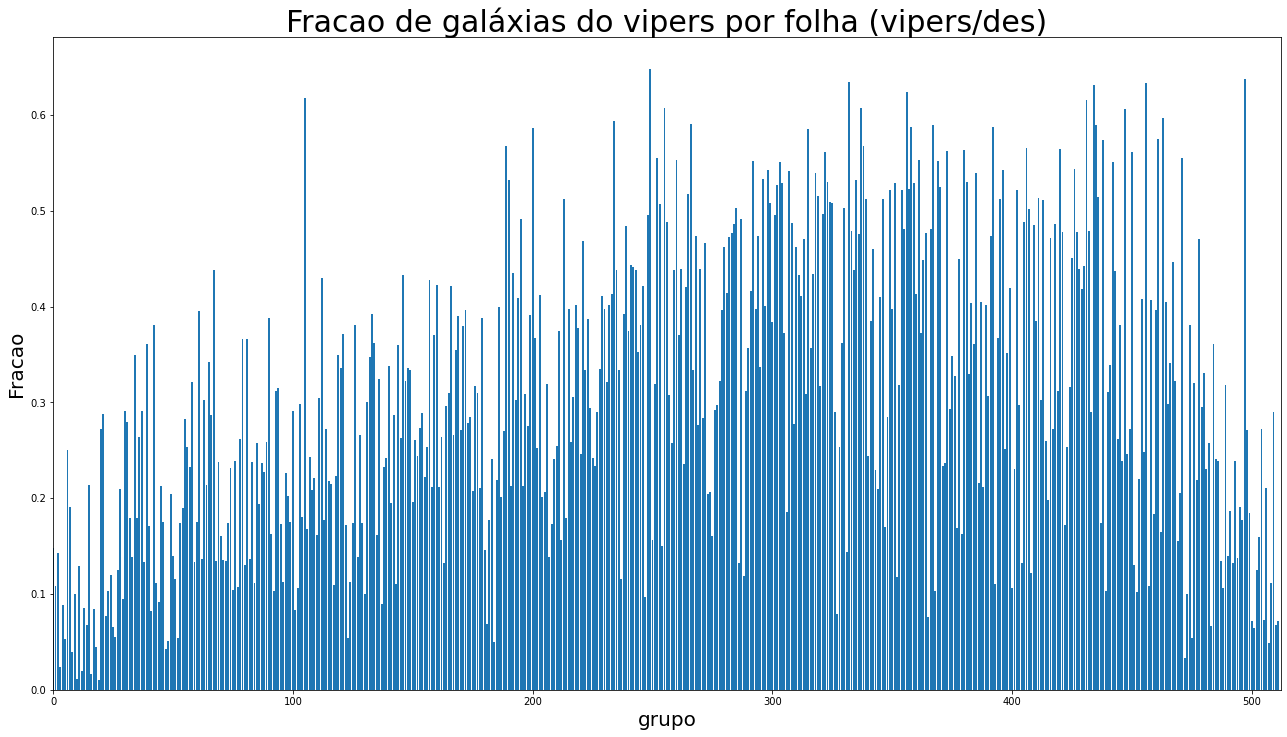

In [97]:
f, (ax) = plt.subplots(1, 1, figsize=(22,12))

cre_fracao = pd.Series(fracao)
plt.bar(range(len(cre_fracao)),cre_fracao[crescente])
plt.title('Fracao de galáxias do vipers por folha (vipers/des)', fontsize=30)
plt.xlabel("grupo", fontsize=20)
plt.ylabel("Fracao", fontsize=20)
ax.set_xlim(0, 512);
#ax.set_ylim(0,1);

In [98]:
cores_des[0]

0         0.122740
1         1.232424
2         2.051382
3         0.682579
4         0.847637
            ...   
798480    1.185781
798481    1.344862
798482    1.442850
798483    0.672670
798484    0.477238
Name: 0, Length: 798485, dtype: float64

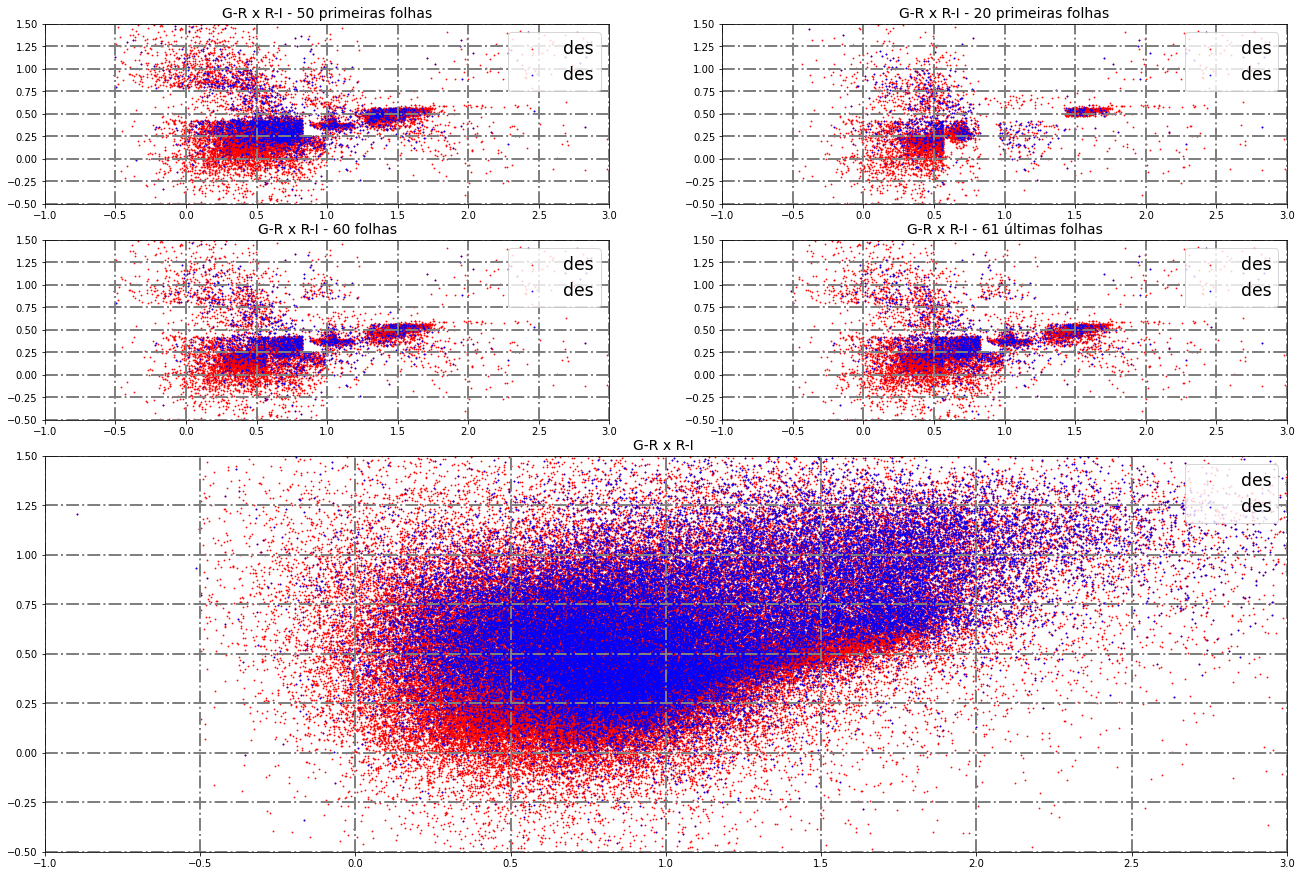

In [99]:
grid = plt.GridSpec(4,2, top= 3, right = 3)

ax1 = plt.subplot(grid[0,0])
grupo_des, grupo_vipers = grupo_dados (0, 80)
plt.scatter(grupo_des.iloc[:,0],grupo_des.iloc[:,1], color='r', label = 'des', s=0.7, alpha = 0.9)
plt.scatter(grupo_vipers.iloc[:,0],grupo_vipers.iloc[:,1], color='b', label = 'des', s=0.7, alpha = 0.9)
ax1.grid(color='grey', linestyle='-.', linewidth=2)
ax1.legend(loc='upper right', fontsize='xx-large')
ax1.set_title('G-R x R-I - 50 primeiras folhas', fontsize=14)
#ax1.set_xlabel("grupo", fontsize=20)
#ax1.set_ylabel("quantidade", fontsize=20)
ax1.set_xlim(-1,3)
ax1.set_ylim(-0.5,1.5)


ax2 = plt.subplot(grid[0,1])
grupo_des, grupo_vipers = grupo_dados (0, 40)
plt.scatter(grupo_des.iloc[:,0],grupo_des.iloc[:,1], color='r', label = 'des', s=0.7, alpha = 0.9)
plt.scatter(grupo_vipers.iloc[:,0],grupo_vipers.iloc[:,1], color='b', label = 'des', s=0.7, alpha = 0.9)
ax2.grid(color='grey', linestyle='-.', linewidth=2)
ax2.legend(loc='upper right', fontsize='xx-large')
ax2.set_title('G-R x R-I - 20 primeiras folhas', fontsize=14)
#ax1.set_xlabel("grupo", fontsize=20)
#ax1.set_ylabel("quantidade", fontsize=20)
ax2.set_xlim(-1,3)
ax2.set_ylim(-0.5,1.5)

ax3 = plt.subplot(grid[1,0])
grupo_des, grupo_vipers = grupo_dados (70, 130)
plt.scatter(grupo_des.iloc[:,0],grupo_des.iloc[:,1], color='r', label = 'des', s=0.7, alpha = 0.9)
plt.scatter(grupo_vipers.iloc[:,0],grupo_vipers.iloc[:,1], color='b', label = 'des', s=0.7, alpha = 0.9)
ax3.grid(color='grey', linestyle='-.', linewidth=2)
ax3.legend(loc='upper right', fontsize='xx-large')
ax3.set_title('G-R x R-I - 60 folhas', fontsize=14)
#ax1.set_xlabel("grupo", fontsize=20)
#ax1.set_ylabel("quantidade", fontsize=20)
ax3.set_xlim(-1,3)
ax3.set_ylim(-0.5,1.5)

ax4 = plt.subplot(grid[1,1])
grupo_des, grupo_vipers = grupo_dados (450, 511)
plt.scatter(grupo_des.iloc[:,0],grupo_des.iloc[:,1], color='r', label = 'des', s=0.7, alpha = 0.9)
plt.scatter(grupo_vipers.iloc[:,0],grupo_vipers.iloc[:,1], color='b', label = 'des', s=0.7, alpha = 0.9)
ax4.grid(color='grey', linestyle='-.', linewidth=2)
ax4.legend(loc='upper right', fontsize='xx-large')
ax4.set_title('G-R x R-I - 61 últimas folhas', fontsize=14)
#ax1.set_xlabel("grupo", fontsize=20)
#ax1.set_ylabel("quantidade", fontsize=20)
ax4.set_xlim(-1,3)
ax4.set_ylim(-0.5,1.5)

ax5 = plt.subplot(grid[2:,:])
grupo_des, grupo_vipers = grupo_dados (0, 511)
plt.scatter(grupo_des.iloc[:,0],grupo_des.iloc[:,1], color='r', label = 'des', s=0.7, alpha = 0.9)
plt.scatter(grupo_vipers.iloc[:,0],grupo_vipers.iloc[:,1], color='b', label = 'des', s=0.7, alpha = 0.9)
ax5.grid(color='grey', linestyle='-.', linewidth=2)
ax5.legend(loc='upper right', fontsize='xx-large')
ax5.set_title('G-R x R-I ', fontsize=14)
#ax1.set_xlabel("grupo", fontsize=20)
#ax1.set_ylabel("quantidade", fontsize=20)
ax5.set_xlim(-1,3)
ax5.set_ylim(-0.5,1.5)

plt.show();

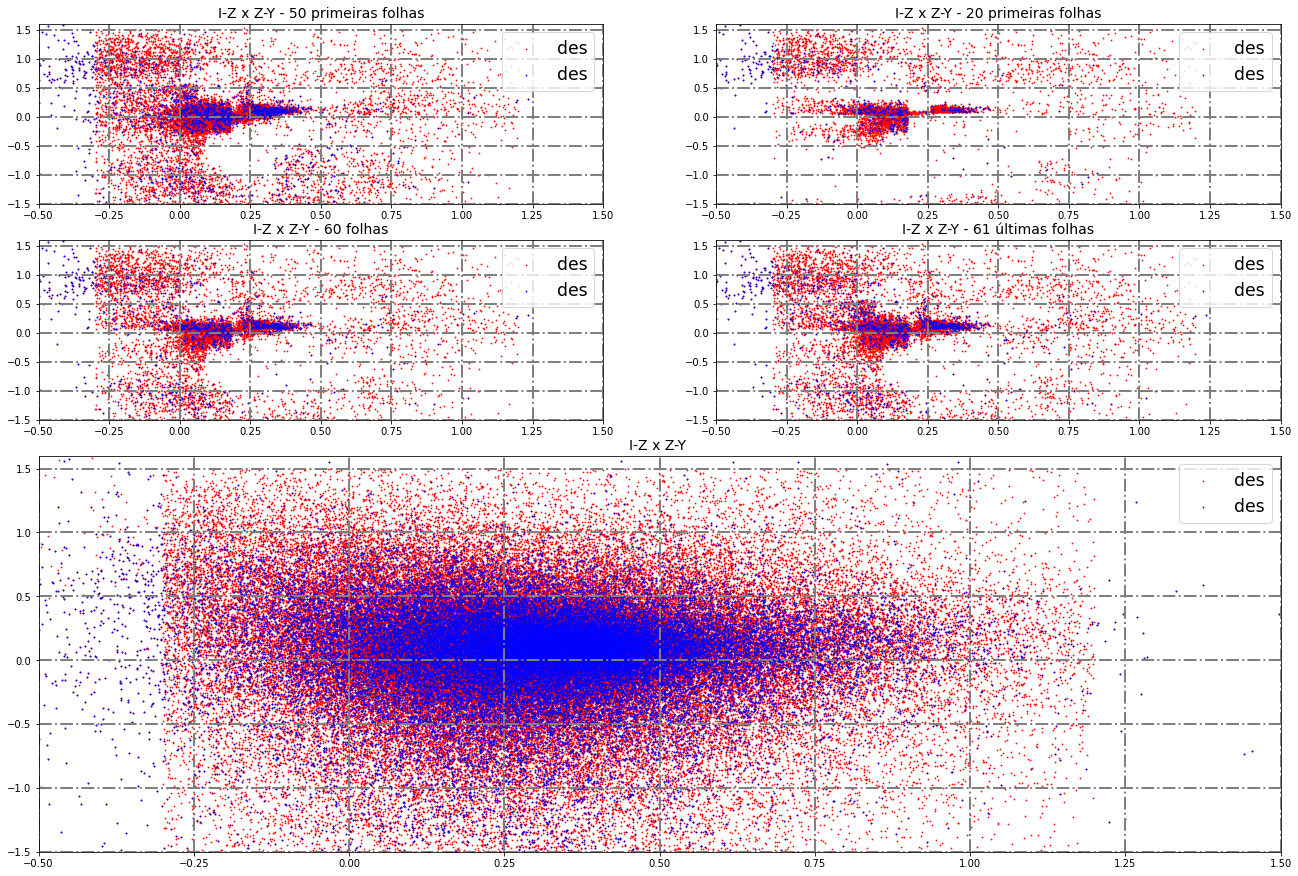

In [100]:
grid = plt.GridSpec(4,2, top= 3, right = 3)

ax1 = plt.subplot(grid[0,0])
grupo_des, grupo_vipers = grupo_dados (0, 80)
plt.scatter(grupo_des.iloc[:,2],grupo_des.iloc[:,3], color='r', label = 'des', s=0.7, alpha = 0.9)
plt.scatter(grupo_vipers.iloc[:,2],grupo_vipers.iloc[:,3], color='b', label = 'des', s=0.7, alpha = 0.9)
ax1.grid(color='grey', linestyle='-.', linewidth=2)
ax1.legend(loc='upper right', fontsize='xx-large')
ax1.set_title('I-Z x Z-Y - 50 primeiras folhas', fontsize=14)
#ax1.set_xlabel("grupo", fontsize=20)
#ax1.set_ylabel("quantidade", fontsize=20)
ax1.set_xlim(-0.5,1.5)
ax1.set_ylim(-1.5,1.6)

ax2 = plt.subplot(grid[0,1])
grupo_des, grupo_vipers = grupo_dados (0, 40)
plt.scatter(grupo_des.iloc[:,2],grupo_des.iloc[:,3], color='r', label = 'des', s=0.7, alpha = 0.9)
plt.scatter(grupo_vipers.iloc[:,2],grupo_vipers.iloc[:,3], color='b', label = 'des', s=0.7, alpha = 0.9)
ax2.grid(color='grey', linestyle='-.', linewidth=2)
ax2.legend(loc='upper right', fontsize='xx-large')
ax2.set_title('I-Z x Z-Y - 20 primeiras folhas', fontsize=14)
#ax1.set_xlabel("grupo", fontsize=20)
#ax1.set_ylabel("quantidade", fontsize=20)
ax2.set_xlim(-0.5,1.5)
ax2.set_ylim(-1.5,1.6)

ax3 = plt.subplot(grid[1,0])
grupo_des, grupo_vipers = grupo_dados (70, 130)
plt.scatter(grupo_des.iloc[:,2],grupo_des.iloc[:,3], color='r', label = 'des', s=0.7, alpha = 0.9)
plt.scatter(grupo_vipers.iloc[:,2],grupo_vipers.iloc[:,3], color='b', label = 'des', s=0.7, alpha = 0.9)
ax3.grid(color='grey', linestyle='-.', linewidth=2)
ax3.legend(loc='upper right', fontsize='xx-large')
ax3.set_title('I-Z x Z-Y - 60 folhas', fontsize=14)
#ax1.set_xlabel("grupo", fontsize=20)
#ax1.set_ylabel("quantidade", fontsize=20)
ax3.set_xlim(-0.5,1.5)
ax3.set_ylim(-1.5,1.6)

ax4 = plt.subplot(grid[1,1])
grupo_des, grupo_vipers = grupo_dados (450, 511)
plt.scatter(grupo_des.iloc[:,2],grupo_des.iloc[:,3], color='r', label = 'des', s=0.7, alpha = 0.9)
plt.scatter(grupo_vipers.iloc[:,2],grupo_vipers.iloc[:,3], color='b', label = 'des', s=0.7, alpha = 0.9)
ax4.grid(color='grey', linestyle='-.', linewidth=2)
ax4.legend(loc='upper right', fontsize='xx-large')
ax4.set_title('I-Z x Z-Y - 61 últimas folhas', fontsize=14)
#ax1.set_xlabel("grupo", fontsize=20)
#ax1.set_ylabel("quantidade", fontsize=20)
ax4.set_xlim(-0.5,1.5)
ax4.set_ylim(-1.5,1.6)

ax5 = plt.subplot(grid[2:,:])
grupo_des, grupo_vipers = grupo_dados (0, 511)
plt.scatter(grupo_des.iloc[:,2],grupo_des.iloc[:,3], color='r', label = 'des', s=0.7, alpha = 0.9)
plt.scatter(grupo_vipers.iloc[:,2],grupo_vipers.iloc[:,3], color='b', label = 'des', s=0.7, alpha = 0.9)
ax5.grid(color='grey', linestyle='-.', linewidth=2)
ax5.legend(loc='upper right', fontsize='xx-large')
ax5.set_title('I-Z x Z-Y ', fontsize=14)
#ax1.set_xlabel("grupo", fontsize=20)
#ax1.set_ylabel("quantidade", fontsize=20)
ax5.set_xlim(-0.5,1.5)
ax5.set_ylim(-1.5,1.6)

plt.show();

In [101]:
len(grupo_vipers)

47126

In [81]:
def grupo_dados (inicio, fim):
    numero = fim - inicio
    grupo_des_plot = []
    grupo_vipers_plot = []
    d = {'G-R': [1], 'R-I': [1], 'I-Z': [1], 'Z-Y': [1]}
    tabela_des_final = pd.DataFrame(data=d)
    tabela_vipers_final = pd.DataFrame(data=d)
    #pegando as primeiras 80 folhas.
    for i in range(numero):
        folha = crescente[i]
        grupo_des = criar_dataset(matriz_des,folha)
        grupo_vipers = criar_dataset(matriz_vipers, folha)
        grupo_vipers = pd.DataFrame(grupo_vipers)
        grupo_des = pd.DataFrame(grupo_des)
        grupo_des = ajeitando_quadrado(grupo_des,grupo_vipers)
        d_des = {'G-R': grupo_des.iloc[:,0], 'R-I': grupo_des.iloc[:,1], 
                 'I-Z': grupo_des.iloc[:,2], 'Z-Y': grupo_des.iloc[:,3]} 
        #print(grupo_vipers.iloc[:,0])
        d_vipers = {'G-R': grupo_vipers.iloc[:,0], 'R-I': grupo_vipers.iloc[:,1], 
                    'I-Z': grupo_vipers.iloc[:,2], 'Z-Y': grupo_vipers.iloc[:,3]}
        tabela_des = pd.DataFrame(data=d_des)
        tabela_vipers = pd.DataFrame(data=d_vipers)
        tabela_des_final = tabela_des_final.append(tabela_des)
        tabela_vipers_final = tabela_vipers_final.append(tabela_vipers)
        tabela_des_final_1 = tabela_des_final.reset_index()     
        tabela_des_final_2 = tabela_des_final_1.drop(tabela_des_final_1.index[0])
        tabela_des_final = tabela_des_final_2.drop(columns=['index'])
        tabela_vipers_final_1 = tabela_vipers_final.reset_index()     
        tabela_vipers_final_2 = tabela_vipers_final_1.drop(tabela_vipers_final_1.index[0])
        tabela_vipers_final = tabela_vipers_final_2.drop(columns=['index'])
    
    return tabela_des_final,tabela_vipers_final

In [79]:
#Criar um dataset com duas tabelas (des e vipers) do mesmo grupo
#e tirar os zeros dela.
def criar_dataset(matriz, i):
        data = np.transpose(matriz[:,:,i])
        #Tirando os zeros da nova tabela 2d:
        data = np.delete(data, np.where(data[:,1]==0), axis=0)
        
        return data

In [80]:
def ajeitando_quadrado (des,vipers):
    grupo = pd.concat([des,vipers]).reset_index(drop=True)
    #Retirando as duplicadas do match.
    ind_duplicadas = np.where(grupo.duplicated(keep='first')==True)[0]
    #print(ind_duplicadas)
    grupo = grupo.drop(ind_duplicadas).reset_index(drop=True)
    
    
    return grupo

In [100]:
#1=i
grupo_des = criar_dataset(matriz_des,420)
grupo_vipers = criar_dataset(matriz_vipers, 420)

In [103]:
grupo_des = pd.DataFrame(grupo_des)
grupo_vipers = pd.DataFrame(grupo_vipers)

In [104]:
grupo_des = ajeitando_quadrado(grupo_des,grupo_vipers)

In [105]:
#Quantidade de galáxias de vipers e do des em cada grupo:
print('Galáxias do des no grupo', 420, ':', len(grupo_des))
print('Galáxias do vipers grupo', 420, ':', len(grupo_vipers))
if len(grupo_des)==0:
    print('porcentagem de vipers no grupo',420,':', 100, '%')
else:    
    print('porcentagem de vipers no grupo',420,':', len(grupo_vipers)/len(grupo_des), '%')

Galáxias do des no grupo 420 : 372
Galáxias do vipers grupo 420 : 199
porcentagem de vipers no grupo 420 : 0.5349462365591398 %


In [82]:
#Função para ter certeza de que todos as cores do vipers estão no des.
def match_grupo (vipers,des):
    
    #Vendo os indíces que tem as cores iguais.
    col_0 = np.where(des.iloc[:,0].isin(vipers[0])==True)
    #print(col_0)
    col_1 = np.where(des.iloc[:,1].isin(vipers[1])==True)
    col_2 = np.where(des.iloc[:,2].isin(vipers[2])==True)
    col_3 = np.where(des.iloc[:,3].isin(vipers[3])==True)
    
    #Fazendo a interseção dos arrays.
    col_4 = np.intersect1d(col_0, col_1)
    #print(col_4)
    col_5 = np.intersect1d(col_2, col_3)
    col_final = np.intersect1d(col_4, col_5)
    #print(col_final.shape)

    if len(col_final)==0:
        print('Deu ruim')
    else:
        print('número de galáxias do vipers no des:',len(col_final))
    
    return col_final

In [107]:
grupo_vipers = pd.DataFrame(grupo_vipers)
grupo_des = pd.DataFrame(grupo_des)

In [108]:
col_indices_match = match_grupo(cores_des.iloc[index_des],grupo_des)

número de galáxias do vipers no des: 199


In [109]:
#Criando a coluna com os números binários 
ID_bi = np.zeros(len(grupo_des))
ID_bi[col_indices_match]=1
ID_bi = pd.Series(ID_bi, name='ID_bi')

Sem matches 46.51 %
Matches 53.49 %


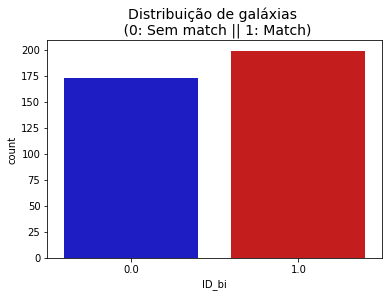

In [110]:
#Ver distribuição dos números binários do match
colors = ["#0101DF", "#DF0101"]

sns.countplot(ID_bi, palette=colors)
plt.title('Distribuição de galáxias \n (0: Sem match || 1: Match)', fontsize=14);

#Testando nos dados originais
print('Sem matches', round(ID_bi.value_counts()[0]/len(ID_bi) * 100,2), '%')
print('Matches', round(ID_bi.value_counts()[1]/len(ID_bi) * 100,2), '%')

In [111]:
#Concatenando as colunas para conseguir misturar os dados
df = pd.concat([grupo_des, ID_bi],  axis = 1)
#Misturando o dataset
df = df.sample(frac=1)

dif_sem_match = len(grupo_des) - len(grupo_vipers)
#Balanceando o dataset
if dif_sem_match<len(grupo_vipers):
    match_df = df.loc[df['ID_bi'] == 1][0:dif_sem_match]
    sem_match_df = df.loc[df['ID_bi'] == 0][0:dif_sem_match]
else:
    match_df = df.loc[df['ID_bi'] == 1]
    sem_match_df = df.loc[df['ID_bi'] == 0][0:len(grupo_vipers)]

normal_distributed_df = pd.concat([match_df, sem_match_df])
new_df = normal_distributed_df.sample(frac=1, random_state=None)

new_df.head()

0         1         2         3  ID_bi
129  0.967438  0.611599  0.282917  0.195932    1.0
120  1.052979  0.577253  0.295738  0.170328    0.0
314  0.935568  0.608976  0.303713  0.113970    1.0
36   1.155144  0.542545  0.290848  0.100227    0.0
242  1.188505  0.618042  0.311163  0.114334    1.0

Distribuição dos matches nos subdados
0.0    0.5
1.0    0.5
Name: ID_bi, dtype: float64


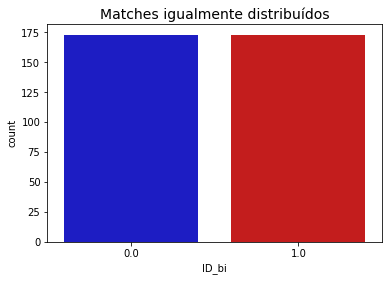

In [112]:
print('Distribuição dos matches nos subdados')
print(new_df['ID_bi'].value_counts()/len(new_df))
sns.countplot('ID_bi', data=new_df, palette=colors)
plt.title('Matches igualmente distribuídos', fontsize=14)
plt.show()

#### Implementando a rede neural

In [113]:
#Divindo o dataset
X = new_df.drop('ID_bi', axis=1)
y = new_df['ID_bi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=None)

In [87]:
model = KNeighborsClassifier(n_neighbors=5, weights= 'distance')

In [88]:
def rede_neural(X,y, total):
    predito = []
    for i in range(10):
        treino_in, teste_in, treino_out, teste_out = train_test_split(X, y, test_size=0.3, random_state=None)
        #print(total.isnull().values.any())
        model.fit(treino_in, treino_out)
        y_pred = model.predict_proba(total)
        #plt.hist(y_pred[:,0], bins=100);
        #print(y_pred)
        predito.append(y_pred[:,1])
    #print(len(predito))    
    predito_final = np.mean(predito,axis=0)
    return predito_final

In [212]:
df.drop('ID_bi', axis=1).shape

(372, 4)

In [213]:
pre_test = rede_neural(X,y, X_test)

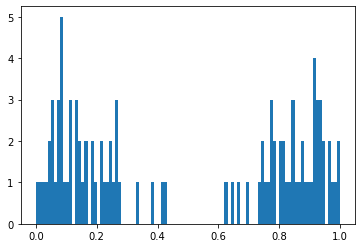

In [214]:
plt.hist(pre_test, bins=100);

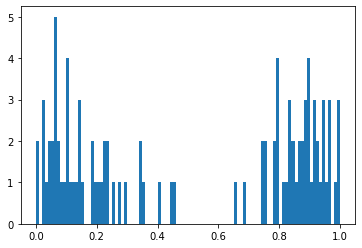

In [180]:
plt.hist(pre_test, bins=100);

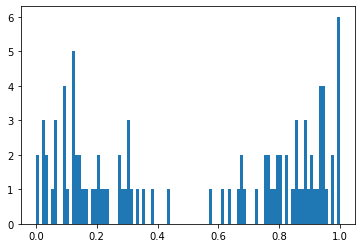

In [176]:
plt.hist(pre_test, bins=100);

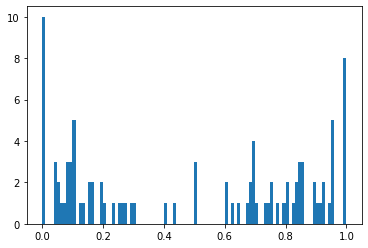

In [172]:
plt.hist(pre_test, bins=100);

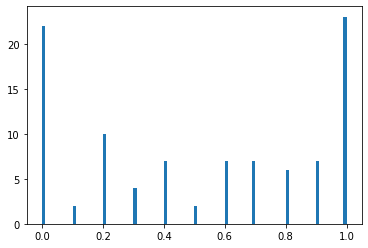

In [167]:
plt.hist(pre_test, bins=100);

In [215]:
#Pelo resultado anterior, temos que o melhor lambda para este caso fica entre 0.5 e 0.4:
lam = []
f_pr =[]
t_pr = []
thresholds_v = []
resultado = []
l=0

for i in range(1000):
    pred = pre_test.copy()
    l = l + 0.001  
    lam.append(l)
    pred = np.where(pred>l,1,0)
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    fpr = pd.Series(fpr[1])
    tpr = pd.Series(tpr[1])  
    thresholds = pd.Series(thresholds[1])       
    f_pr.append(fpr)
    t_pr.append(tpr)
    thresholds_v.append(thresholds)
    resultado.append(roc_auc_score(y_test, pred))

In [216]:
f_pr = pd.DataFrame(f_pr)
t_pr = pd.DataFrame(t_pr)
lam = pd.Series(lam, name='lam')
thresholds_v = pd.DataFrame(thresholds_v)

In [217]:
list(t_pr[0])

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [218]:
np.argmax(tpr[0] - fpr[0])

0

In [219]:
#Para achar o lambda, vamos achar o indíce onde a diferença entre TPR e FPR é a maior.
index_max = (t_pr[0] - f_pr[0]).idxmax(axis = 0) 
print(index_max)

print('Lambda com o melhor corte:', round(lam[np.array(index_max).item()],3),
      '\nTPR=', round(t_pr.iloc[np.array(index_max).item(),0],2),
      '\nFPR=', round(f_pr.iloc[np.array(index_max).item(),0],2))

424
Lambda com o melhor corte: 0.425 
TPR= 1.0 
FPR= 0.02


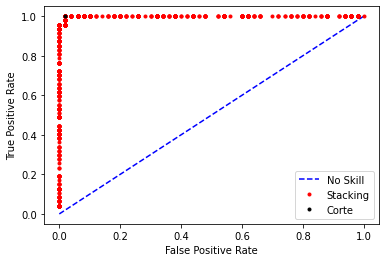

In [220]:
plt.plot([0,1], [0,1], linestyle='--', label='No Skill', color='b')
plt.plot(f_pr[0] , t_pr[0],  '.', label='Stacking', color='r')
plt.plot(f_pr.iloc[np.array(index_max).item(),0] , t_pr.iloc[np.array(index_max).item(),0],  '.', label='Corte', color='k')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
df.drop('ID_bi', axis=1)

In [229]:
print('ROC score:', roc_auc_score(y_test, pre_test))

ValueError: Found input variables with inconsistent numbers of samples: [125, 97]

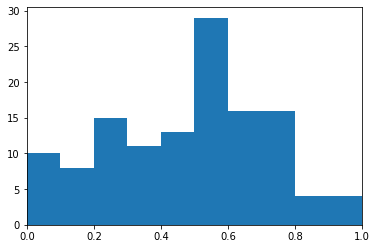

In [635]:
plt.hist(pre_test)
plt.xlim(0,1)
plt.show();

In [676]:
model = LogisticRegression(random_state=0, penalty='l2', 
                         class_weight='balanced', solver = 'saga',
                        multi_class = 'auto')

In [636]:
min(pre_test)

0.0

In [218]:
model = Sequential()
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [219]:
model_2 = LogisticRegressionCV(penalty='l2',Cs=10,max_iter=100,
                                          solver='lbfgs',multi_class='auto',
                                          cv=3)

In [275]:
#Definindo os modelos
level0 = list()
level0.append(('lr', LogisticRegressionCV(penalty='l2',Cs=10,max_iter=100,
                                          solver='lbfgs',multi_class='auto',
                                          cv=3)))
level0.append(('knn', KNeighborsClassifier(n_neighbors=11, weights='uniform')))
level0.append(('bayes', GaussianNB()))
#Definindo o modelo que irá "julgar" as redes
level1 = LogisticRegression()
model_2 = StackingClassifier(estimators=level0,
                             final_estimator=LogisticRegression(),
                             stack_method='predict',
                             cv=5)

In [165]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [306]:
predito = []

def rede_neural(X,y,total):
    for i in range(10):
        treino_in, teste_in, treino_out, teste_out = train_test_split(X, y, test_size=0.3, random_state=None)
        model_2.fit(treino_in, treino_out)
        y_pred = model_2.predict_proba(X_test)
        #print(y_pred[:,0])
        predito.append(y_pred[:,1])
    predito_final = np.mean(predito,axis=0)
    return predito_final

In [277]:
predito = []
keras_pred_2 = rede_neural(X,y,df.iloc[:,0:4])

[0.61624016 0.36589762 0.23081636 0.36589762 0.45506392 0.36589762
 0.36589762 0.36589762 0.36589762 0.72160245 0.36589762 0.61624016
 0.36589762 0.36589762 0.36589762 0.36589762 0.45506392 0.61624016
 0.36589762 0.36589762 0.36589762 0.48224436 0.36589762 0.61624016
 0.36589762 0.61624016 0.36589762 0.36589762 0.36589762 0.36589762
 0.36589762 0.61624016 0.61624016 0.36589762 0.36589762 0.45506392
 0.61624016 0.61624016 0.36589762 0.36589762 0.48224436 0.61624016
 0.61624016 0.72160245 0.36589762 0.36589762 0.36589762 0.61624016
 0.45506392 0.36589762 0.36589762 0.61624016 0.36589762 0.36589762
 0.61624016 0.36589762 0.23081636 0.61624016 0.36589762 0.36589762
 0.61624016 0.61624016 0.61624016 0.61624016 0.36589762 0.36589762
 0.36589762 0.36589762 0.61624016 0.36589762 0.36589762 0.36589762
 0.45506392 0.36589762 0.61624016 0.48224436 0.61624016 0.48224436
 0.23081636 0.36589762 0.36589762 0.36589762 0.36589762 0.36589762
 0.36589762 0.36589762 0.36589762 0.36589762 0.36589762 0.3658

In [234]:
model.fit(X_train, y_train)
keras_pred = model.predict(df.iloc[:,0:4])

11/11 [==============================] - 0s 1ms/step - loss: 0.7113 - accuracy: 0.4845


In [347]:
clf_pred[:,1]

array([0.35028994, 0.56847991, 0.40135686, ..., 0.55367842, 0.38397774,
       0.59628297])

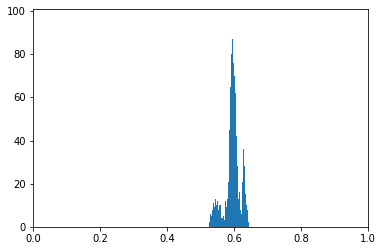

In [223]:
plt.hist(keras_pred, bins=100)
plt.xlim(0,1);

In [238]:
min(keras_pred_2)

0.43961224609732685

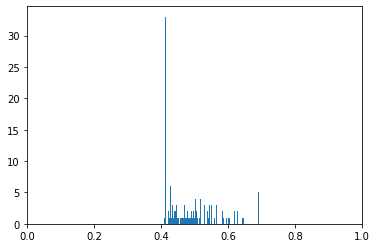

In [278]:
plt.hist(keras_pred_2, bins=100)
plt.xlim(0,1);

In [107]:
keras_pred_pd = pd.Series(keras_pred[:,0])

In [108]:
tabela = pd.DataFrame()
tabela["G-R"] = df.drop('ID_bi', axis=1).iloc[:,0]
tabela["R-I"] = df.drop('ID_bi', axis=1).iloc[:,1]
tabela["I-Z"] = df.drop('ID_bi', axis=1).iloc[:,2]
tabela["Z-Y"] = df.drop('ID_bi', axis=1).iloc[:,3]
tabela["lambda"] = keras_pred_pd
#1=i
tabela["z"] = 1

In [109]:
tabela

G-R       R-I       I-Z       Z-Y    lambda  z
24    2.198721  0.935999  0.529688  0.299269  0.570677  1
1595  2.278086  1.104851  0.850088  0.193323  0.454839  1
1143  2.191618  1.087114  0.452036  0.194372  0.579804  1
466   1.999008  1.108429  0.863710  0.182293  0.547174  1
1332  2.272018  1.026014  0.789932  0.176121  0.581647  1
...        ...       ...       ...       ...       ... ..
2538  1.901823  1.072435  0.976385  0.102057  0.565399  1
874   2.506201  1.144863  0.873009  0.217482  0.386156  1
1395  2.665951  1.092112  1.000265  0.486282  0.424577  1
2023  1.855068  0.920233  0.538816  0.197136  0.512335  1
1934  2.143158  0.599285  0.515671  0.175362  0.560267  1

[2840 rows x 6 columns]

ROC curve

In [671]:
#Pelo resultado anterior, temos:
lam = []
f_pr =[]
t_pr = []
thresholds_v = []
resultado = []
l=0

for i in range(1000):
    pred = pre_test.copy()
    l = l + 0.001  
    lam.append(l)
    pred = np.where(pred>l,1,0)
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    fpr = pd.Series(fpr[1])
    tpr = pd.Series(tpr[1])  
    thresholds = pd.Series(thresholds[1])       
    f_pr.append(fpr)
    t_pr.append(tpr)
    thresholds_v.append(thresholds)
    resultado.append(roc_auc_score(y_test, pred))

In [672]:
f_pr = pd.DataFrame(f_pr)
t_pr = pd.DataFrame(t_pr)
lam = pd.Series(lam, name='lam')
thresholds_v = pd.DataFrame(thresholds_v)

In [673]:
#Para achar o lambda, vamos achar o indíce onde a diferença entre TPR e FPR é a maior.
index_max = (t_pr - f_pr).idxmax(axis = 0) 

print('Lambda com o melhor corte:', round(lam[np.array(index_max).item()],3),
      '\nTPR=', round(t_pr.iloc[np.array(index_max).item(),0],2),
      '\nFPR=', round(f_pr.iloc[np.array(index_max).item(),0],2))

Lambda com o melhor corte: 0.374 
TPR= 0.98 
FPR= 0.0


In [674]:
max(t_pr[0])

1.0

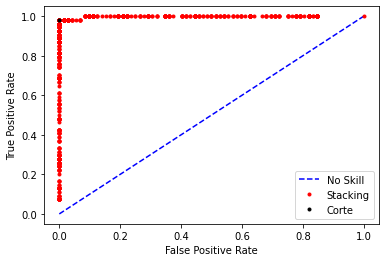

In [675]:
plt.plot([0,1], [0,1], linestyle='--', label='No Skill', color='b')
plt.plot(f_pr[0] , t_pr[0],  '.', label='Stacking', color='r')
plt.plot(f_pr.iloc[np.array(index_max).item(),0] , t_pr.iloc[np.array(index_max).item(),0],  '.', label='Corte', color='k')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [284]:
y_pred = np.where(keras_pred_2>round(lam[np.array(index_max).item()],2),1,0)

In [295]:
pred = (predi - min(predi))/(max(predi)-min(predi))

In [258]:
predi.shape

(16,)

In [94]:
sum(x)

29

In [126]:
col_3 = np.where(grupo_des[3].isin(grupo_vipers[3])==True)

In [127]:
#Para ordenar as cores junto ao dataset original do des.
df1 = df1.set_index('Col2')
df1 = df1.reindex(index=df2['Col2'])
df1 = df1.reset_index()

In [128]:
col_1 = np.where(grupo_des[1].isin(grupo_vipers[1])==True)

In [129]:
col_2 = np.where(grupo_des[2].isin(grupo_vipers[2])==True)

In [124]:
col_1 = np.array(col_1)
col_2 = np.array(col_2)
col_3 = np.array(col_3)
col_0 = np.array(col_0)

In [132]:
np.where(grupo_des[3].isin(grupo_vipers[3])==True)

(array([ 212,  214,  276,  692,  704, 1327, 1557, 1590, 1685, 1702, 1717,
        1723, 1747, 1776, 1809, 1851, 1927, 1959, 2103, 2142, 2157, 2170,
        2185, 2200, 2248, 2440, 2485, 2751, 2793]),)

In [130]:
np.where(col_3.isin(col_0)==True)

AttributeError: 'tuple' object has no attribute 'isin'

In [131]:
##ESCUTAR O AUDIO DE NOVO (o que precisa do redshift???)
#Contar a quantiade de galáxias vipers e des em cada grupo.
#Fazer coluna extra com os ID dos dois datasets
#Criar uma coluna binaria com os que fizeram match
#implementar a rede neural
#fazer o histograma
#fazer a roc curve
##acho:onde se encontra cada agaláxia no histograma (determinar o lambda dela) - criar uma nova coluna com os lambdas

In [99]:
#Colocar tudo isso dentro de um for para conseguir fazer com todos os grupos

In [93]:
#Colocar junto da coluna des_Id os lambdas e os z (numero do grupo)

NameError: name 'des' is not defined

In [226]:
#Colocar a primeira linha (2D) da matriz dez com os nós de cada grupo.
for i in range(grupos.shape[0]):
    matriz_des[0,0,i] = grupos[i,0]
    matriz_des[1,0,i] = grupos[i,1]
    matriz_des[2,0,i] = grupos[i,2]
    matriz_des[3,0,i] = grupos[i,3]

In [157]:
matriz_des[:,0,2]

array([ 0.38424873,  0.09555626,  0.01919365, -0.3919239 ])

In [240]:
cores_vipers[100]

array([0.49684906, 0.71114922, 0.4446106 , 0.00845909])

In [239]:
kdtree_ponto_mais_perto(kdtree,cores_vipers[100])

array([0.8062458 , 0.80660057, 0.33026695, 0.14572716])

In [260]:
distancia(cores_vipers[1000],cores_des[1000])

1.7287544304307714

In [251]:
len(kdtree['lef']['lef']['lef']['lef']['lef']['lef']['lef']['lef'])

KeyError: 1

In [255]:
axis = depth + 1

In [203]:
axis

1

In [45]:
sorted_points

['G-R', 'I-Z', 'R-I', 'Z-Y']

In [46]:
G-R[45]

NameError: name 'G' is not defined

In [506]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

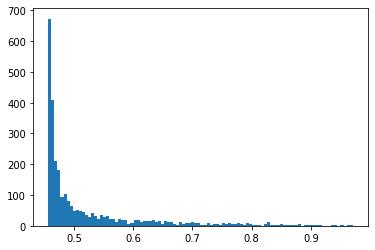

In [543]:
plt.hist(keras_pred, bins=100);

In [172]:
#Achar o vizinho mais próximo com todo o dataset.
def ponto_perto(todos_pontos, novo_ponto):
    melhor_ponto = None
    melhor_distancia = None
    
    for ponto_atual in todos_pontos:
        distancia_atual = distancia(novo_ponto, ponto_atual)
        
        if melhor_distancia is None or distancia_atual<melhor_distancia:
                melhor_ponto = ponto_atual
                melhor_distancia = distancia_atual
            
    return ponto_atual    